# Step 0: Load necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

###  Step 1: Load the Dataset

We will use the **Adult Income dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult).  
This dataset is used to predict whether a person earns more than \$50K a year based on their demographic information.

The dataset includes:
- A **training set** (`adult.data`)
- A **test set** (`adult.test`)

Then do the following:
1. Use `.shape` to check how many rows and columns the dataset has.
2. Use `.head()` to display the first few rows of the dataset.

In [2]:
# URL of the training data
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Column names
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Load the training dataset
df_train = pd.read_csv(
    train_url,
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)

print("Training set shape:", df_train.shape)
df_train.head()


Training set shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Step 2: Load and Clean the Test Dataset

The test dataset is very similar to the training dataset but has:
- A header row that we should skip
- `income` labels that include a period at the end, like `>50K.`

We will:
- Load the data
- Use the same column names
- Clean the `income` column by removing periods and extra spaces


In [3]:
# URL of the test data
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Load the test dataset
df_test = pd.read_csv(
    test_url,
    header=None,
    names=columns,
    skiprows=1,            # Skip header line with text
    na_values='?',
    skipinitialspace=True
)

print("Test set shape:", df_test.shape)
df_test.head()


Test set shape: (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.



You might see that `.head()` shows **2 unique values** in both the training and test sets for the `income` column.  

But are those labels *exactly the same* in both datasets?

Let’s check more closely:

```python
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())
```

Take a careful look at the test labels — is there an extra character at the end?

---

###  Why This Matters

This tiny difference (a period `"."` at the end) might not look like a big deal, but it actually means the test labels are **different strings**.  
If we don’t fix this, your model could get confused — it might think `'>50K'` and `'>50K.'` are two different classes!

Even though your code might still run, your **accuracy will be wrong** if the labels don’t match.

---

###  Fix it!

Can you figure out how to **clean the labels** so the train and test values match?



In [5]:
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())

Train labels: ['<=50K' '>50K']
Test labels: ['<=50K.' '>50K.']


In [6]:
#TODO
df_test['income'] = df_test['income'].str.replace(r'\.$', '', regex=True)
print("Test labels:", df_test['income'].unique())

Test labels: ['<=50K' '>50K']


# Step 3: Explore the Dataset

Now that we've loaded the dataset, it's time to explore it!
<br/>
In Data Science, Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics—often using statistical graphics, plots, and other visualization tools.
<br/>
<br/>
EDA typically involves two main parts:
- Numerical statistics
- Visual analysis


## Numerical statistics

First, we’ll try to get some basic numerical insights from the dataset
<br/>
We’ll use:
- `describe` -- to get statistics like mean, standard deviation, min, max, and quartiles for the numerical features.
- `info` --  to get an overview of the dataset structure, including feature names, data types, non-null counts, and memory usage.
- `head(n)` – shows the first n rows of the dataset (default is 5). Great for a quick glance at the data.

- `shape` – returns a tuple showing the number of rows and columns.

- `value_counts()` – shows frequency counts for unique values in a column (great for categorical data).

- `isnull().sum()` – helps identify missing values per column.

- `duplicated().sum()` – shows total number of duplicated values.

In [7]:
print("First 5 rows of the dataset:")
print(df_train.head())

print("\nDataset Information:")
df_train.info()

print("\nSummary Statistics:")
print(df_train.describe())

print("\nDataset Shape (rows, columns):", df_train.shape)

print("\nValue Counts for Categorical Columns:")
for column in df_train.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for '{column}':")
    print(df_train[column].value_counts())


First 5 rows of the dataset:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1            

### Check for Missing Values

In [8]:
#TODO
print("\nMissing Values per Column:")
print(df_train.isnull().sum())


Missing Values per Column:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


### Check for Duplicates

In [9]:
#TODO
print("\nNumber of Duplicated Rows:", df_train.duplicated().sum())


Number of Duplicated Rows: 24


## Visual analysis

The first step in visual analysis is to explore the distributions of features in the dataset. This helps us understand the shape of the data, detect outliers, and identify potential data quality issues or patterns.
<br/>
Common approaches include:
<br/>
- Bar plots – great for visualizing the distribution of categorical variables.

- Histograms – useful for showing the frequency distribution of numerical features.

- Box plots – helpful to spot outliers and understand the spread and skewness of data.

- Count plots – a variant of bar plots, often used with categorical data.

- KDE plots (Kernel Density Estimation) – smooth curves that estimate the probability distribution of a numerical variable.

- Pie charts – sometimes used for simple categorical distribution, though not always preferred.

### Visualizing the Target Variable


Since our target variable (`income`) is categorical, we can use a count plot to visualize its distribution. This helps us understand the class balance (e.g., whether the data is imbalanced):


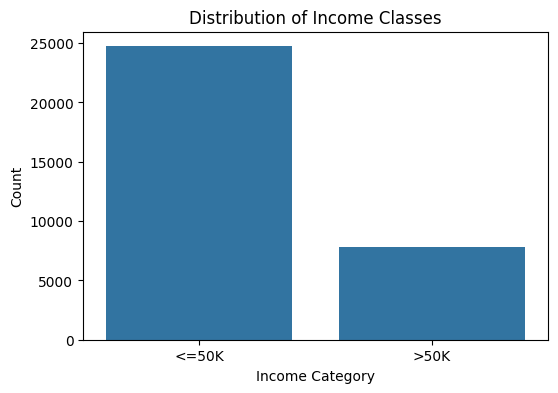

In [10]:
#TODO
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df_train)
plt.title('Distribution of Income Classes')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

### Exploring Education Level Distribution


Now, let's check the distribution of education levels in the dataset. This gives us insight into the average persona or demographic represented in the data

---
Answer the following questions:
- What is the most earned degree among participants?
- Is there a connection between education level and income?


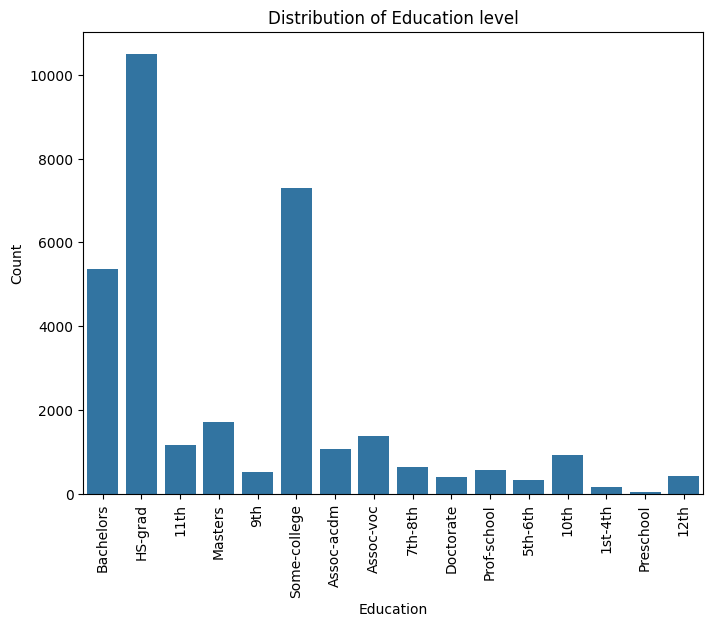

In [11]:
#TODO
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=df_train)
plt.title('Distribution of Education level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

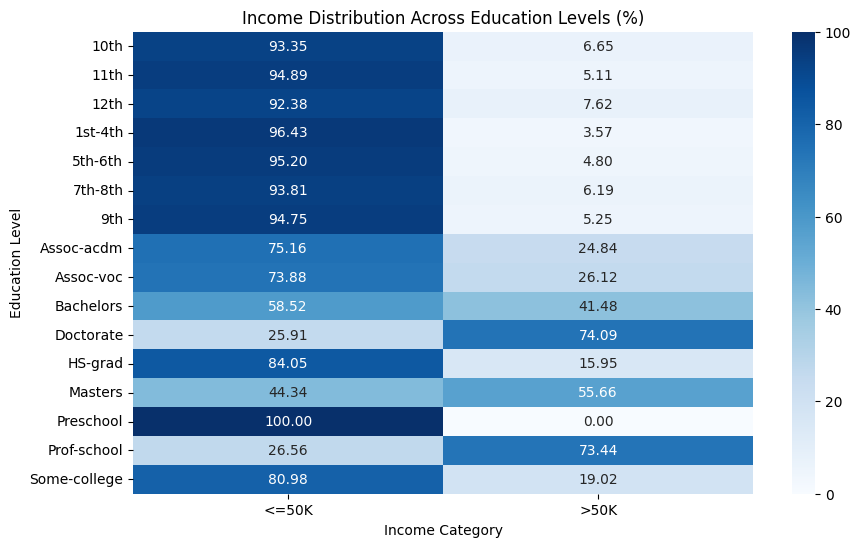

In [12]:
#TODO
education_income_ct = pd.crosstab(df_train['education'], df_train['income'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(education_income_ct, annot=True, cmap='Blues', fmt='.2f')
plt.title('Income Distribution Across Education Levels (%)')
plt.xlabel('Income Category')
plt.ylabel('Education Level')
plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

1. Based on the plot, the most earned degree is highschool graduate (HS-grad).
2. The second plot is a heatmap and shows that 'Doctrate' and 'Prof-school' education levels are more associated with >50k income and values such as 'preschool', 'some-college' are associated with incomes of <=50k.
</p>
</font>
<hr>

### Exploring the Relationship Between Nationality and Income

Exploring the income distribution across different nationalities reveals trends in earnings. This analysis can highlight which nationalities are more likely to earn higher income, providing insights into the potential socio-economic factors associated with nationality in the dataset

---

Tasks:
- Plot Nationality Distribution
- Compare Nationality vs. Income
- Identify Dominant Nationality with Highest Income Proportion

#### Task 1: Plot Nationality Distribution

Visualize the distribution of nationalities in the dataset to understand the representation of individuals from different countries. This will help in assessing the relative population of each nationality before comparing their income distributions

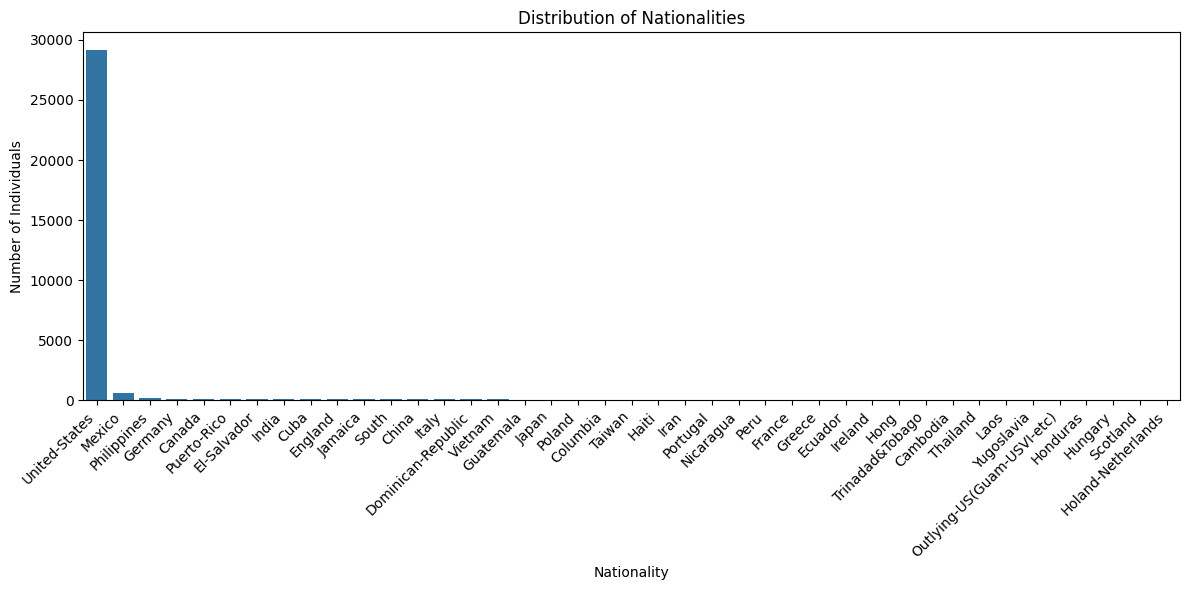

In [13]:
#TODO
nationality_counts = df_train['native-country'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values)
plt.title('Distribution of Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Task 2: Compare Nationality vs. Income

Compare the income levels (`<=50K` and `>50K`) across different nationalities. This analysis will show how income distribution varies by nationality, helping to identify trends in income disparity among different nationalities.

<Figure size 2000x900 with 0 Axes>

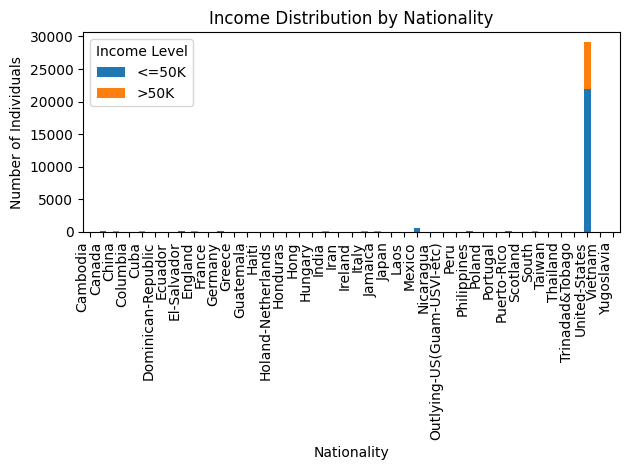

In [14]:
#TODO
income_distribution = df_train.groupby(['native-country', 'income']).size().unstack(fill_value=0)

# Plot the distribution
plt.figure(figsize=(20, 9))
income_distribution.plot(kind='bar', stacked=True)
plt.title('Income Distribution by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Income Level')
plt.tight_layout()
plt.show()

Filter out the dominant nationality (the one with the highest population proportion) and perform the analysis on the remaining nationalities. This will help focus on the income distribution across nationalities excluding the one with the most significant representation, offering a more nuanced view of the income distribution among less-represented nationalities.

---
Answer Following Question:
- Which nationality is the second most populous in America, and what is their income distribution? What factors might explain these income patterns?

In [15]:
#TODO
pop_counts = df_train['native-country'].value_counts()
pop_props = pop_counts / pop_counts.sum()

dominant_nationality = pop_props.idxmax()
print(f"Dominant nationality: {dominant_nationality} ({pop_props.max():.1%} of population)")

df_filtered = df_train[df_train['native-country'] != dominant_nationality]

second_most = pop_counts.index[1]
print(f"\nSecond most populous nationality: {second_most} ({pop_props[second_most]:.1%})")

second_dist = (
    df_train[df_train['native-country'] == second_most]
      ['income']
      .value_counts(normalize=True)
      .rename_axis('income_category')
      .reset_index(name='proportion')
)
print(f"\nIncome category distribution for {second_most}:")
print(second_dist)

Dominant nationality: United-States (91.2% of population)

Second most populous nationality: Mexico (2.0%)

Income category distribution for Mexico:
  income_category  proportion
0           <=50K    0.948678
1            >50K    0.051322


<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

The second most common nationality in America is Mexico and 94% of the population with this nationality have income levels of <=50k which could've been influenced by the lower levels of education and being immigrants which puts them in jobs with lower incomes.

</p>
</font>
<hr>

#### Task 3: Identify Dominant Nationality with Highest Income Proportion

Identify the nationality with the highest proportion of individuals earning more than 50K. This analysis helps highlight nationalities that are more likely to achieve higher earnings, providing insight into socio-economic patterns

---

Answer the folloiwng Question:
- What is the nationality with the highest proportion of individuals earning more than 50K? can you explian that?

In [16]:
df_train['high_income'] = df_train['income'] == '>50K'

prop_by_nat = df_train.groupby('native-country')['high_income'].mean()
top_nat = prop_by_nat.idxmax()
top_prop = prop_by_nat.max()

print(f"Nationality with highest proportion of >50K earners: {top_nat}")
print(f"Proportion: {top_prop:.2%}")

print("\nTop 5 nationalities by >50K proportion:")
print(prop_by_nat.sort_values(ascending=False).head(5).apply(lambda x: f"{x:.2%}"))

Nationality with highest proportion of >50K earners: Iran
Proportion: 41.86%

Top 5 nationalities by >50K proportion:
native-country
Iran      41.86%
France    41.38%
India     40.00%
Taiwan    39.22%
Japan     38.71%
Name: high_income, dtype: object


<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

This could be influenced by the fact that because of the fact that Iran has lower monetary value compared to other countries and only the very rich people are able to travel to USA and be included in this data.

</p>
</font>
<hr>

### Exploring Hours per Week Distribution

#### Task 1: Plot hours-per-week distribution
Plot KDE and histogram of hours-per-week and determine typical work hours.


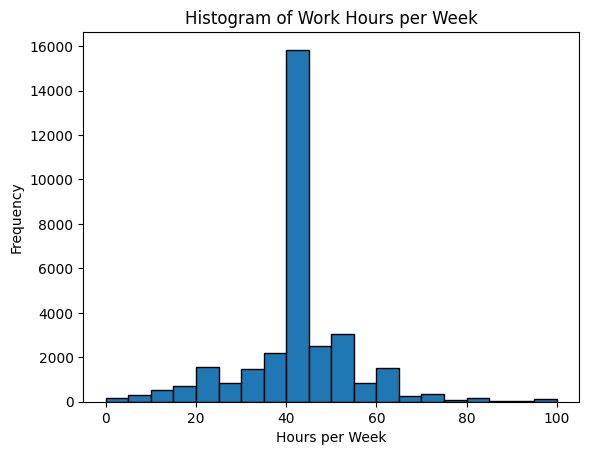

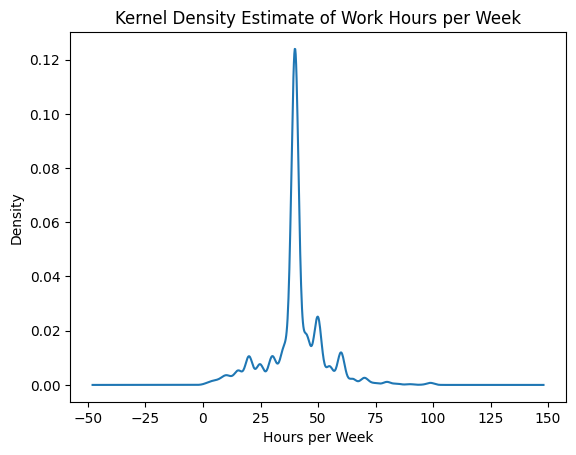

Mean work hours per week: 40.44
Median work hours per week: 40.0
Mode of work hours per week: 40


In [17]:
#TODO
hours = df_train["hours-per-week"]

# Histogram
plt.figure()
plt.hist(hours, bins=range(0, hours.max() + 5, 5), edgecolor='black')
plt.title("Histogram of Work Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.show()

#KDE
plt.figure()
hours.plot.kde()
plt.title("Kernel Density Estimate of Work Hours per Week")
plt.xlabel("Hours per Week")
plt.show()

mean_hours = hours.mean()
median_hours = hours.median()
mode_hours = hours.mode().iloc[0]

print(f"Mean work hours per week: {mean_hours:.2f}")
print(f"Median work hours per week: {median_hours}")
print(f"Mode of work hours per week: {mode_hours}")

### Exploring the Relationship Between Sex and Income

#### Task 1: Plot and Compare Sex in the Dataset

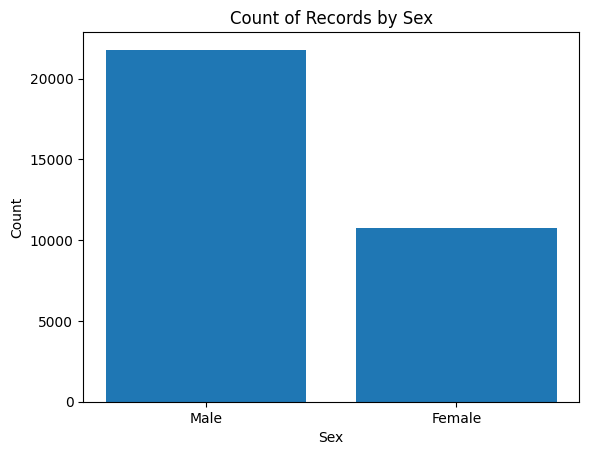

In [18]:
#TODO
sex_counts = df_train['sex'].value_counts()
plt.figure()
plt.bar(sex_counts.index, sex_counts.values)
plt.title("Count of Records by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

#### Task 2: Plot and Compare Income by Gender

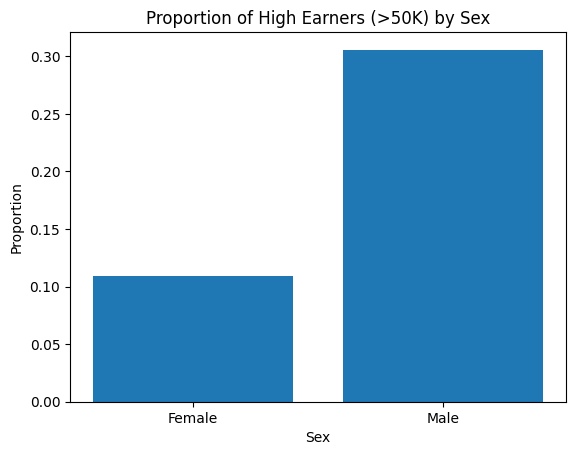

In [19]:
#TODO
prop_high_by_sex = df_train.groupby('sex')['high_income'].mean()
plt.figure()
plt.bar(prop_high_by_sex.index, prop_high_by_sex.values)
plt.title("Proportion of High Earners (>50K) by Sex")
plt.xlabel("Sex")
plt.ylabel("Proportion")
plt.show()

### Exploring Relationship between Age and Income

#### Task 1: Visualize the Distribution of Age vs. Income using violinplot

Answer the following questions:

- What patterns can be observed in the age group with income above 50k?

- Is it common for younger individuals to have an income above 50k?

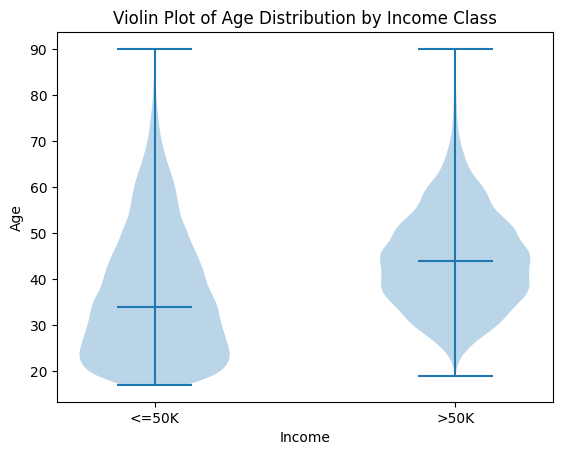

In [20]:
#TODO
ages_le = df_train[df_train["income"] == "<=50K"]["age"]
ages_gt = df_train[df_train["income"] == ">50K"]["age"]

plt.figure()
plt.violinplot([ages_le, ages_gt], showmedians=True)
plt.xticks([1, 2], ["<=50K", ">50K"])
plt.title("Violin Plot of Age Distribution by Income Class")
plt.ylabel("Age")
plt.xlabel("Income")
plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

1. The distribution on the right shows that income levels of >50k is most commonly seen in middle-aged people around 45 years-old.

2. It's not common for younger individuals to have income levels of >50k and they are generally in the <=50k group.

</p>
</font>
<hr>

#### Task 2: Visualize and Compare the Age Distribution Across Different Races using a Violin Plot

Answer the Following question:
- Which race has the highest concentration of middle-aged individuals?

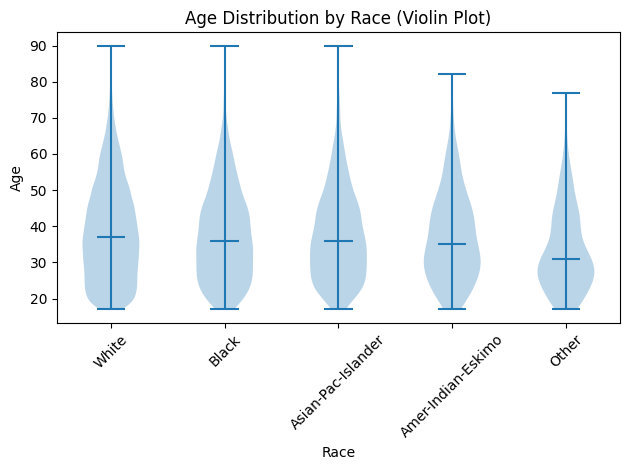

In [21]:
#TODO
race_categories = df_train['race'].unique()
age_distributions = [df_train[df_train['race'] == race]['age'] for race in race_categories]

plt.figure()
plt.violinplot(age_distributions, showmedians=True)
plt.xticks(range(1, len(race_categories) + 1), race_categories, rotation=45)
plt.title("Age Distribution by Race (Violin Plot)")
plt.xlabel("Race")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

Among the races, whites have the highest proportion of middle-aged individuals.

</p>
</font>
<hr>

### Exploring Relationship between Race and Income

#### Task 1: Visualize the Income Distribution Across Different Races

<Figure size 640x480 with 0 Axes>

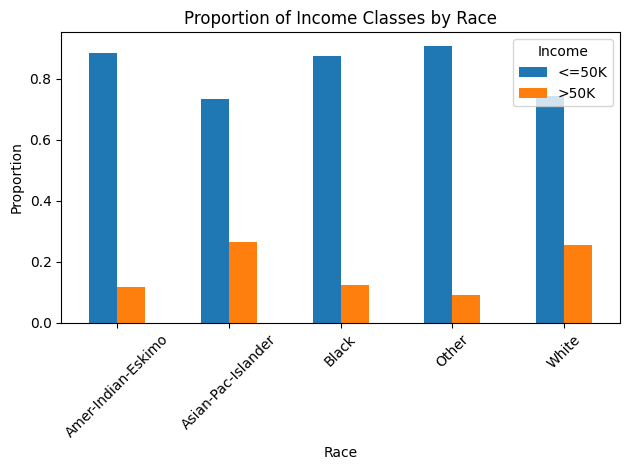

In [22]:
#TODO
counts = df_train.groupby(['race', 'income']).size().unstack(fill_value=0)
proportions = counts.div(counts.sum(axis=1), axis=0)

plt.figure()
proportions.plot(kind='bar')
plt.title("Proportion of Income Classes by Race")
plt.xlabel("Race")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Income")
plt.tight_layout()
plt.show()

#### Task 2: Plot and Sort Races Based on the Highest Proportion of High-Income Individuals Across Races

Answer the following question:

- Which race has the highest proportion of high-income individuals?

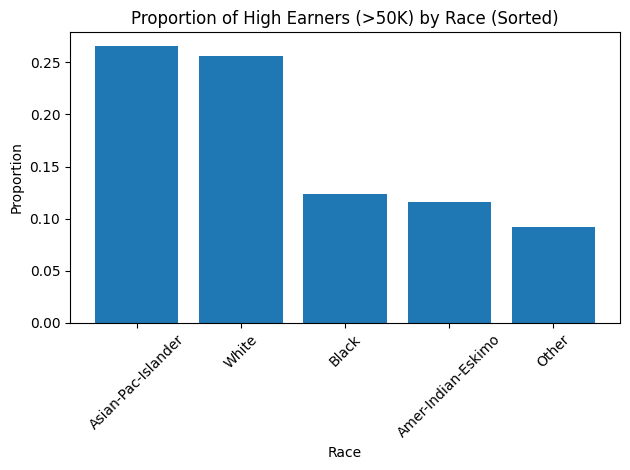

Proportion of >50K earners by race (descending):
race
Asian-Pac-Islander    26.56%
White                 25.59%
Black                 12.39%
Amer-Indian-Eskimo    11.58%
Other                  9.23%
Name: high_income, dtype: object


In [23]:
#TODO
prop_by_race = df_train.groupby('race')['high_income'].mean().sort_values(ascending=False)

plt.figure()
plt.bar(prop_by_race.index, prop_by_race.values)
plt.xticks(rotation=45)
plt.title("Proportion of High Earners (>50K) by Race (Sorted)")
plt.xlabel("Race")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()

print("Proportion of >50K earners by race (descending):")
print((prop_by_race * 100).round(2).astype(str) + "%")

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

Asian-Pac-Islander shows the highest >50K proportions.

</p>
</font>
<hr>

### Exploring the Relationship Between Marital Status and Income


- Similar to the previous sections, use various plots to explore and identify patterns between the `Relationship`, `Marital Status`, and `Income` features. You are free to choose any types of plots that you find suitable for the analysis.

<Figure size 640x480 with 0 Axes>

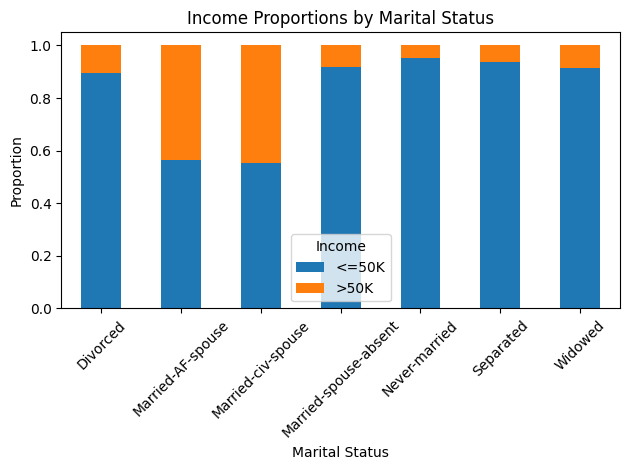

<Figure size 640x480 with 0 Axes>

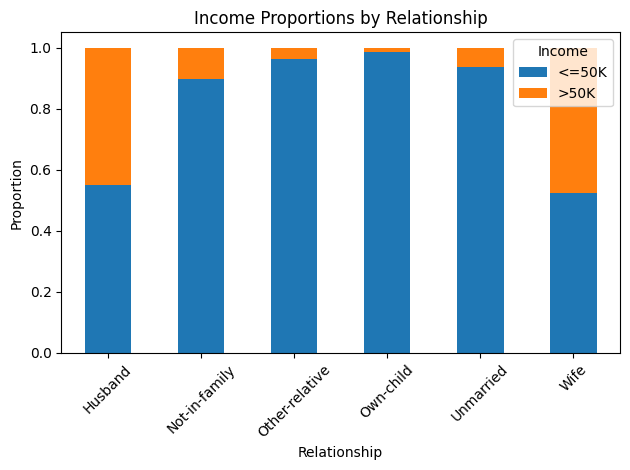

In [24]:
# TODO
ms_counts = df_train.groupby(['marital-status', 'income']).size().unstack(fill_value=0)
ms_prop = ms_counts.div(ms_counts.sum(axis=1), axis=0)

rel_counts = df_train.groupby(['relationship', 'income']).size().unstack(fill_value=0)
rel_prop = rel_counts.div(rel_counts.sum(axis=1), axis=0)

plt.figure()
ms_prop.plot(kind='bar', stacked=True)
plt.title("Income Proportions by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Income")
plt.tight_layout()
plt.show()

plt.figure()
rel_prop.plot(kind='bar', stacked=True)
plt.title("Income Proportions by Relationship")
plt.xlabel("Relationship")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Income")
plt.tight_layout()
plt.show()

### Exploring the Relationship Between Occupation, Workclass and Income

- Similar to the previous sections, use various plots to explore and identify patterns between the `Occupation`, `Workclass`, and `Income` features. You are free to choose any types of plots that you find suitable for the analysis.

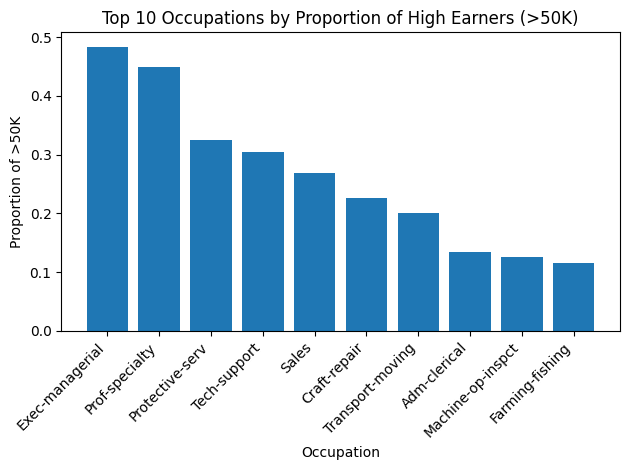

<Figure size 640x480 with 0 Axes>

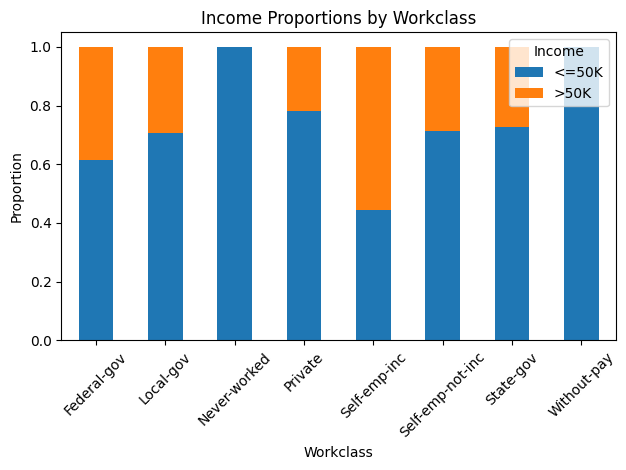

Top 10 occupations by proportion of >50K earners:
occupation
Exec-managerial       48.4%
Prof-specialty        44.9%
Protective-serv      32.51%
Tech-support          30.5%
Sales                26.93%
Craft-repair         22.66%
Transport-moving     20.04%
Adm-clerical         13.45%
Machine-op-inspct    12.49%
Farming-fishing      11.57%
Name: high_income, dtype: object

Proportion of income classes by workclass:
income            <=50K   >50K
workclass                     
Federal-gov       61.35  38.65
Local-gov         70.52  29.48
Never-worked      100.0    0.0
Private           78.13  21.87
Self-emp-inc      44.27  55.73
Self-emp-not-inc  71.51  28.49
State-gov          72.8   27.2
Without-pay       100.0    0.0


In [25]:
# TODO
occ_prop = df_train.groupby('occupation')['high_income'].mean().sort_values(ascending=False)

top_occ = occ_prop.head(10)
plt.figure()
plt.bar(top_occ.index, top_occ.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Occupations by Proportion of High Earners (>50K)")
plt.xlabel("Occupation")
plt.ylabel("Proportion of >50K")
plt.tight_layout()
plt.show()

wc_counts = df_train.groupby(['workclass', 'income']).size().unstack(fill_value=0)
wc_prop = wc_counts.div(wc_counts.sum(axis=1), axis=0)

plt.figure()
wc_prop.plot(kind='bar', stacked=True)
plt.title("Income Proportions by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Income")
plt.tight_layout()
plt.show()

print("Top 10 occupations by proportion of >50K earners:")
print((top_occ * 100).round(2).astype(str) + "%")

print("\nProportion of income classes by workclass:")
print((wc_prop * 100).round(2).astype(str))

### Describing the Final Persona

Based on the insights from the previous sections, describe a persona that has a high likelihood of earning above 50k in a year. Consider factors such as age, race, marital status, and relationship status to outline the characteristics of this individual.

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

Overall, it seems that a middle-aged Asian-Pac-Islander man who is married and is a self-employed manager will have a high income.

</p>
</font>
<hr>

# Step 4: Handle Missing Values


There are several ways to deal with missing values. Below are some common strategies:

### Missing Value Strategies

#### For **numerical features**:
- `Drop rows` that have missing values
- `Fill with mean`
- `Fill with median`
- `Use KNN or regression imputation`

#### For **categorical features**:
- `Drop rows` with missing categories
- `Fill with the most frequent value` (mode)
- `Fill with a new category` like "Unknown"
- `Use model-based imputation`

---

 **Task**:  
1. **Which method(s) do you think are best for this dataset?**  
2. **Why?** Consider the number of missing values, the type of features, and how it may affect modeling.  
3. Implement your chosen strategy below.


In [26]:
# TODO: Choose and implement your own missing value handling strategy
# Write your code below:
print("Missing before filling:")
print(df_train.isna().sum().loc[["workclass","occupation","native-country"]])
print()

fill_map = {
    "workclass": "Unknown",
    "occupation": "Unknown",
    "native-country": "Unknown"
}
df = df_train.fillna(value=fill_map)

print("Missing after filling:")
print(df.isna().sum().loc[["workclass","occupation","native-country"]])

Missing before filling:
workclass         1836
occupation        1843
native-country     583
dtype: int64

Missing after filling:
workclass         0
occupation        0
native-country    0
dtype: int64


In [27]:
#TODO
print("Test missing before filling:")
print(df_test[['workclass','occupation','native-country']].isna().sum())

fill_map = {
    "workclass": "Unknown",
    "occupation": "Unknown",
    "native-country": "Unknown"
}
test = df_test.fillna(value=fill_map)

print("\nTest missing after filling:")
print(test[['workclass','occupation','native-country']].isna().sum())

Test missing before filling:
workclass         963
occupation        966
native-country    274
dtype: int64

Test missing after filling:
workclass         0
occupation        0
native-country    0
dtype: int64


<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

No numerical features have missing data, so we leave them as-is.
For categorical features with missing values, fill with a new category "Unknown". Since these are categorical fields, it’s more informative to mark the missingness explicitly rather than impute a “best guess” (mode) — the fact that a person’s occupation or workclass is unknown may itself carry signal.

</p>
</font>
<hr>

# Step 7: Identify Categorical Features


Most machine learning models require numerical input. We must convert **categorical columns** to numbers.

There are several encoding methods. Each method has strengths and weaknesses depending on the dataset and the type of model you're using.

---

### Common Encoding Techniques

1. **One-Hot Encoding**  
2. **Label Encoding**  
3. **Frequency Encoding**  
4. **Target / Mean Encoding**  
5. **Binary Encoding**  
6. **Hash Encoding**

---

 **Your Task**:

1. Research the methods above (or based on what we've discussed in class).
2. For each method, briefly write down:
   - When you might use it
   - Its potential pros and cons
3. Choose the one(s) you think work best for this dataset.
4. Explain **why** your choice is appropriate.
5. Implement your encoding method(s) in the code cell below.




In [28]:
# TODO: Encode categorical columns using the method you chose

# Example (One-Hot Encoding):
# df_train = pd.get_dummies(df_train, columns=categorical_cols)

# Write your code below:
to_onehot = [
    "workclass", "education", "marital-status",
    "occupation", "relationship", "race", "sex", "income"
]
train_ohe = pd.get_dummies(df_train, columns=to_onehot, drop_first=True)

In [29]:
#TODO
freq = df_train["native-country"].value_counts(normalize=True)
train_ohe["native-country_freq"] = df["native-country"].map(freq)

train_ohe = train_ohe.drop(columns=["native-country"])

In [30]:
#TODO
test_ohe = pd.get_dummies(df_test, columns=to_onehot, drop_first=True)
ohe_columns = [c for c in train_ohe.columns if any(c.startswith(col + "_") for col in to_onehot)]
country_freq = df_train["native-country"].value_counts(normalize=True)

for col in ohe_columns:
    if col not in test_ohe:
        test_ohe[col] = 0

test_ohe = test_ohe.reindex(columns=[
    *[c for c in test_ohe.columns if c not in ohe_columns],
    *ohe_columns
])

test_ohe["native-country_freq"] = test_ohe["native-country"].map(country_freq).fillna(0.0)

test_ohe = test_ohe.drop(columns=["native-country"])

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

Most categorical features here (workclass, education, marital-status, relationship, race, sex, occupation) have low or moderate cardinality.

native-country has ~~40 categories—big enough to make one-hot less attractive.

Selected approach: One-Hot Encoding for: workclass, education, marital-status, relationship, race, sex, occupation (keeps things simple and maximally expressive for linear or tree models)

Frequency Encoding for: native-country (avoids adding ~40 extra sparse columns, still gives signal about how common each origin is)


</p>
</font>
<hr>

# Step 8: Correlation Matrix (Numerical Features)

Correlation helps us understand how strongly features are related to each other.  
This is useful for:
- Detecting multicollinearity (when features are too similar)
- Spotting features that might be predictive of the target variable

We'll compute the correlation matrix and visualize it with a heatmap.


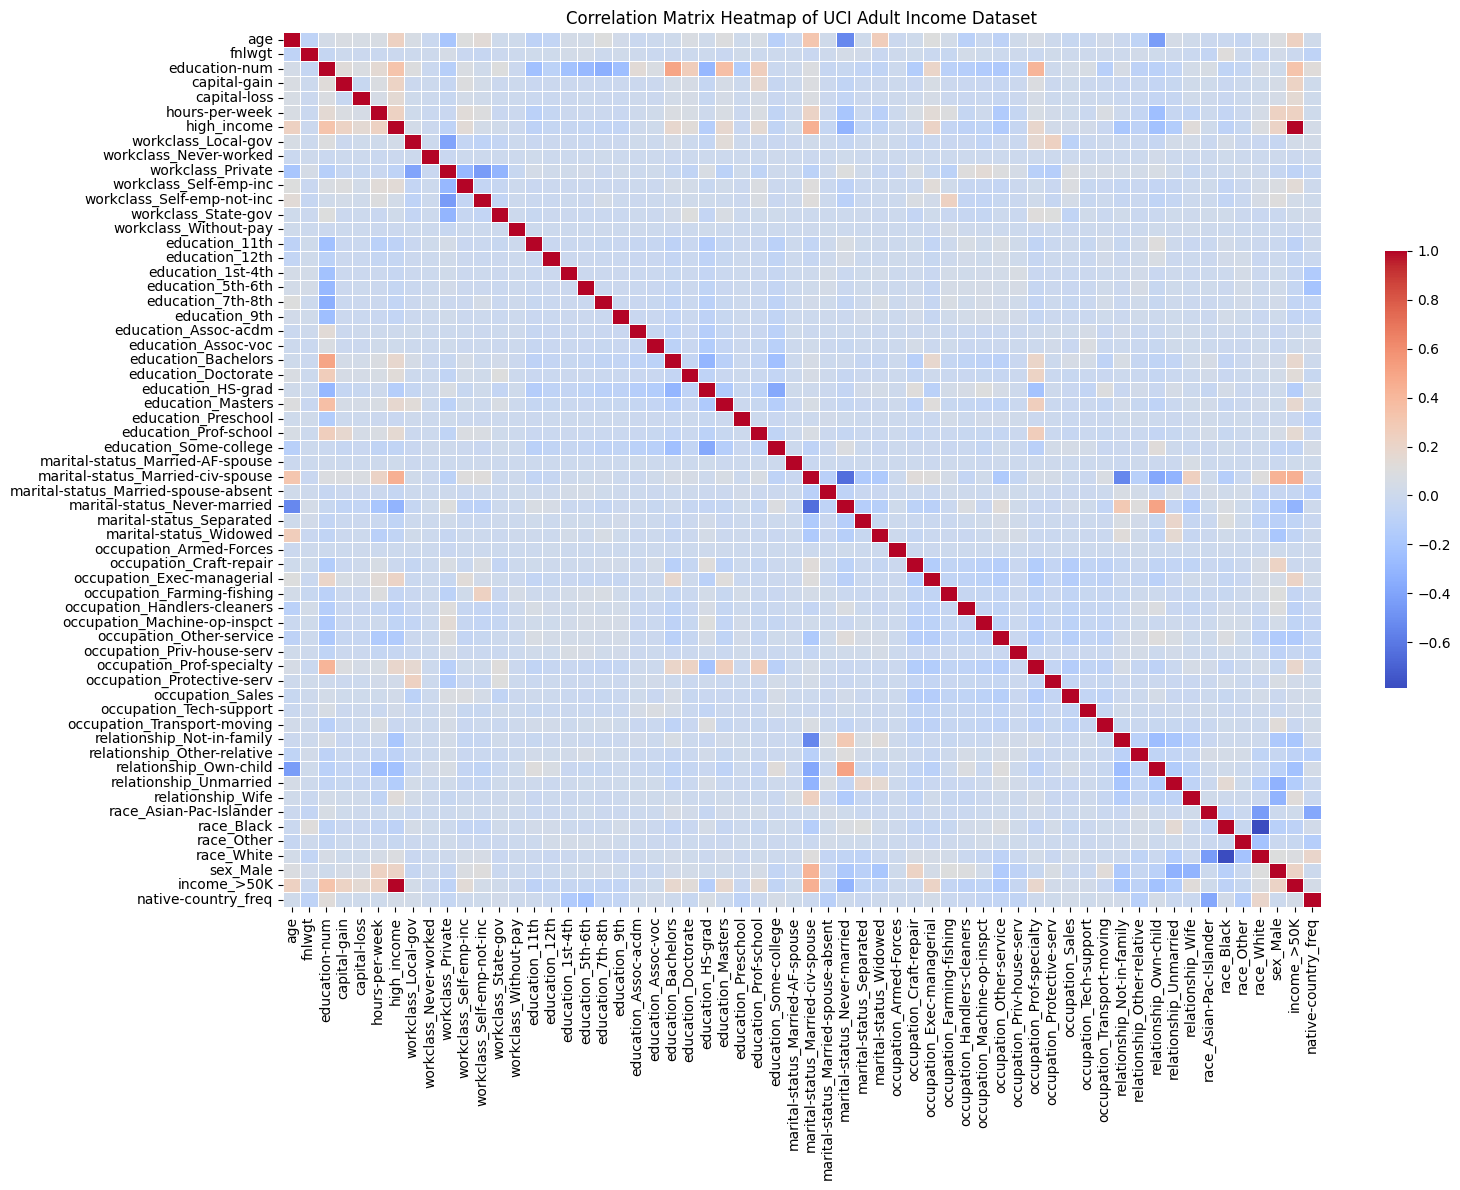

In [31]:
#TODO
corr_matrix = train_ohe.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'shrink': 0.5},
    xticklabels=True,
    yticklabels=True
)
plt.title('Correlation Matrix Heatmap of UCI Adult Income Dataset')
plt.tight_layout()
plt.show()

# Step 9: Feature Scaling

Before addressing class imbalance, we apply feature scaling to the numerical features.
Scaling ensures that features contribute equally to the model training process and improves convergence for many machine learning algorithms.

### Scaling Methods:

#### 1. StandardScaler
- standardizes features by removing the mean and scaling to unit variance.

#### 2. MinMaxScaler
- scales features to a given range (usually [0, 1]).

#### 3. MaxAbsScaler

- scales features by their maximum absolute value.

#### 4. RobustScaler
- scales features using statistics that are robust to outliers.

#### 5. Normalizer
- scales individual samples to have unit norm.

---
 **Your Task**:
1. Choose a scaling method and explain your reasoning.
2. Implement your chosen method below.



In [32]:
#TODO
from sklearn.preprocessing import RobustScaler
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = RobustScaler()

train_ohe[numeric_cols] = scaler.fit_transform(train_ohe[numeric_cols])
test_ohe[numeric_cols] = scaler.transform(test_ohe[numeric_cols])

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

RobustScaler is ideal when numeric features (like capital_gain and capital_loss) have significant outliers, since it scales based on the interquartile range rather than the mean and variance.

</p>
</font>
<hr>

# Step 10: Dealing with Class Imbalance

### Identifying Class Imbalance
In classification problems, it is common to have **imbalanced** classes, where one class has far more examples than the other. This can negatively impact model performance since many standard algorithms assume a balanced dataset.

**Question**: Where do we use resampling?

Our target variable `income` is imbalanced — most people earn `<=50K`.

This imbalance can cause models to:
- Be biased toward the majority class
- Fail to learn patterns of the minority class

### Resampling Techniques

#### 1. Random OverSampling
- Duplicate samples from the minority class

#### 2. Random UnderSampling
- Remove samples from the majority class

#### 3. SMOTE (Synthetic Minority Over-sampling Technique)
- Generate new synthetic samples from the minority class

---

 **Your Task**:
1. Inspect the class distribution.
2. Choose a resampling strategy and explain your reasoning.
3. Implement your strategy below.


In [33]:
#TODO
from collections import Counter
from imblearn.over_sampling import SMOTE

train_ohe.dropna(inplace=True)
test_ohe.dropna(inplace=True)

y_train = train_ohe['income_>50K']
X_train = train_ohe.drop(columns=['income_>50K'])

y_test = test_ohe['income_>50K']
X_test = test_ohe.drop(columns=['income_>50K'])

print('Original dataset shape:', Counter(y_train))

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape:', Counter(y_train_res))

Original dataset shape: Counter({False: 24283, True: 7695})
Resampled dataset shape: Counter({False: 24283, True: 24283})


<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
SMOTE synthetically generates minority-class examples based on feature-space nearest neighbors, helping the model learn minority patterns without discarding any majority samples.

</p>
</font>
<hr>

### Re-evaluating the Need for Resampling:  
<b> <font color='red'>Question:</font></b> In this case, should we use resampling or not, and why?  

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

Machine learning algorithms like Random Forest, K-Nearest Neighbors, Naive Bayes, Support Vector Machines, Neural Networks, and AdaBoost are sensitive to imbalanced data, often favoring the majority class and misclassifying the minority class. Becuase the negative class is around three times larger than the postivie class, resampling could improve model performances.

</p>
</font>
<hr>

# Step 11: Modeling and Evaluation

In this part of the project, you will apply and compare several machine learning models on the training dataset. Each model uses a different mathematical approach to learn from the data and make predictions. Your goal is to identify the most effective model based on the evaluation metrics and determine which model provides the best generalization to unseen data.

## 11.1 Overview of the Modeling Section
You need to implement a range of classifiers that represent different types of machine learning algorithms, including:

- **K-Nearest Neighbors (KNN):** A simple, non-parametric method that makes predictions based on the majority class of the nearest neighbors in the feature space.
- **Decision Trees:** A tree-like model where decisions are made based on feature values, with each branch representing a feature condition and each leaf representing a class label.
- **Random Forest:** An ensemble of decision trees that improves prediction accuracy by averaging multiple models to reduce overfitting.
- **Gradient Boosting Methods (XGBoost, LightGBM):** Advanced ensemble techniques that build trees sequentially, where each new tree attempts to correct the errors of the previous one.
- **Logistic Regression:** A linear model used for binary or multi-class classification that predicts the probability of class membership.
- **Support Vector Machines (SVM):** A classifier that finds the hyperplane that best separates data points of different classes.
- **Neural Networks:** A class of models inspired by biological neural networks, capable of learning complex patterns in large datasets.

**Write a function that:**

- **Takes** `y_test` (true labels) and `y_pred` (predicted labels),
- **Computes**: Accuracy, Precision, Recall, F1,
- **Plots**: ROC Curve + AUC and Precision-Recall curve,
- **Displays**: Confusion Matrix.

**Note: You may need to read Part 13 before implementing this function.**

In [34]:
#TODO
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

def evaluate_classification(y_true, y_pred, y_prob=None, pos_label=1):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=pos_label)
    rec = recall_score(y_true, y_pred, pos_label=pos_label)
    f1 = f1_score(y_true, y_pred, pos_label=pos_label)

    metrics = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, pos_label])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, pos_label])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    if y_prob is not None:
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_true, y_prob, pos_label=pos_label)
        roc_auc = auc(fpr, tpr)
        metrics['roc_auc'] = roc_auc
        plt.figure()
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], linestyle='--', lw=1)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_true, y_prob, pos_label=pos_label)
        avg_prec = average_precision_score(y_true, y_prob, pos_label=pos_label)
        metrics['average_precision'] = avg_prec
        plt.figure()
        plt.plot(recall, precision, lw=2, label=f'Precision-Recall (AP = {avg_prec:.4f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.show()

    return metrics

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [41]:
X_train_res = X_train_res.drop(columns=["high_income"])

KeyError: "['high_income'] not found in axis"

###1)K-Nearest Neighbors (KNN)

KNN is a simple algorithm that makes predictions based on the closest data points in the training set. It looks at the ‘K’ nearest neighbors (based on distance) to a new point and assigns the most common class among those neighbors.

 **Your Task**:
1.  Implement and train the KNN classifier on the training dataset.(and then evaluate it on the test dataset)

Accuracy: 0.8231
Precision: 0.5940
Recall: 0.7936
F1 Score: 0.6794


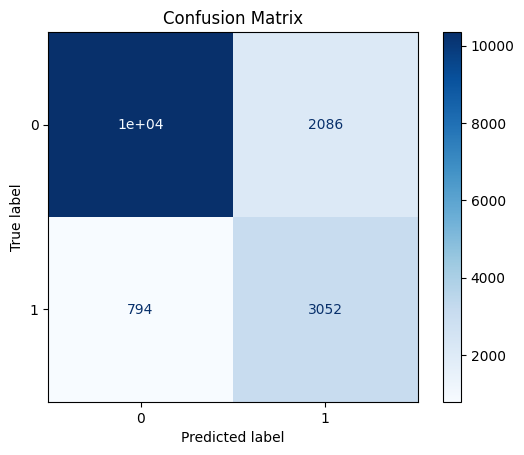

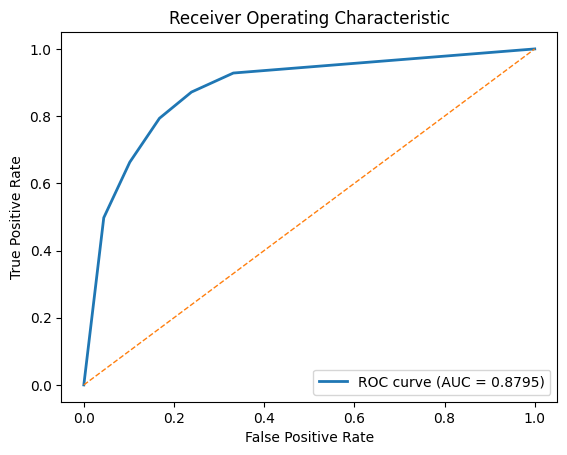

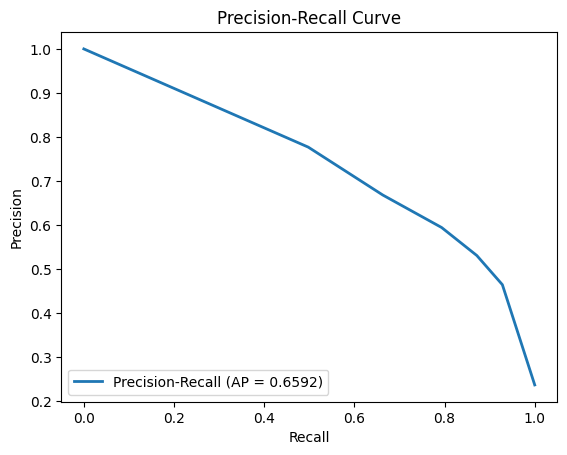

In [ ]:
#TODO
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]
metrics = evaluate_classification(y_test, y_pred, y_prob=y_prob, pos_label=1)

2. Answer this question:How does  'K' in KNN  affect the model's performance?

<b> <font color='red'>Your Answer:</font></b><br>

The selection of K involves a trade-off between bias and variance:

Low K: Low bias, high variance. The model captures more details (including noise) from the training data.

High K: High bias, low variance. The model generalizes more from the training data but may miss subtle patterns.

Finding the optimal K balances this trade-off to minimize prediction error.

###2)Decision Tree

A decision tree makes predictions by splitting the data into smaller groups based on feature values. At each step (node), it chooses the best condition to separate the data, leading to a tree-like structure where each leaf gives a prediction.

 **Your Task**:
1. Implement and train the Decision Tree classifier on the training dataset.(and then evaluate it on the test dataset)

Accuracy: 0.8093
Precision: 0.5887
Recall: 0.6396
F1 Score: 0.6131


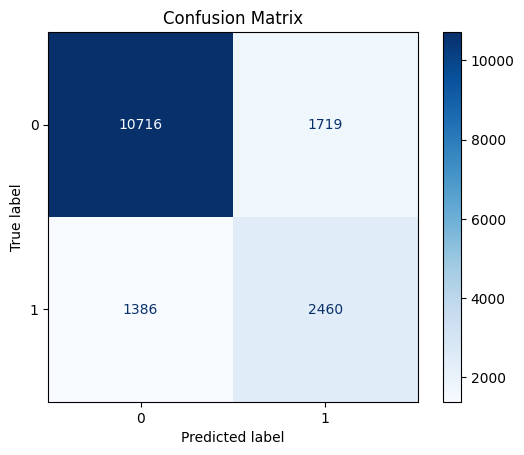

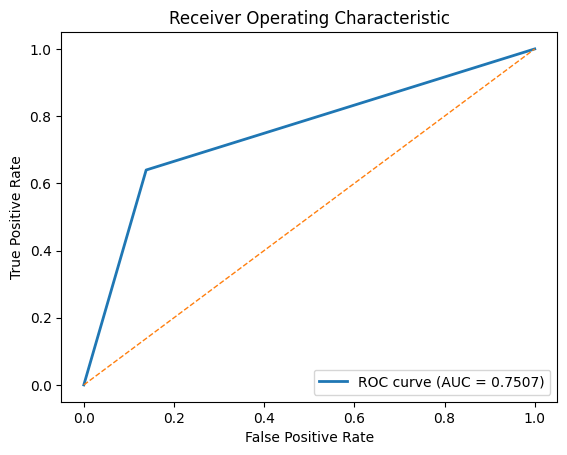

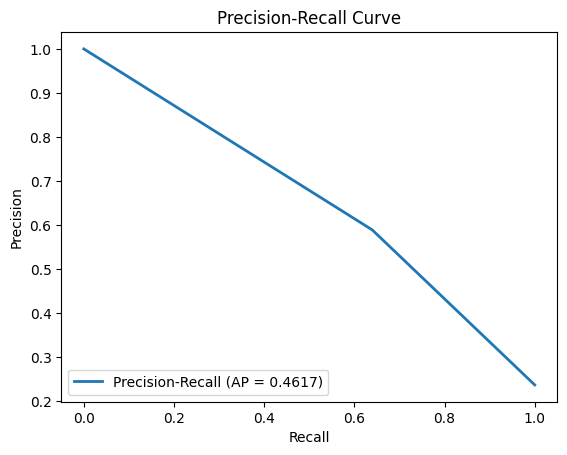

In [ ]:
#TODO
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]
metrics_dt = evaluate_classification(y_test, y_pred_dt, y_prob=y_prob_dt, pos_label=1)

2. Answer this question:How does a decision tree decide where to split the data?

<b> <font color='red'>Your Answer:</font></b><br>
A decision tree “decides” where to split by exhaustively (or heuristically) evaluating all potential splits, measuring how much each one improves the purity (classification) or reduces the variance (regression) of its children, and picking the split that gives the largest improvement.

###3)Random Forest (Ensemble of Decision Trees)

Random Forest is an ensemble method that builds many decision trees on different parts of the data and combines their results. Each tree votes on the prediction, and the majority vote is taken as the final output.

 **Your Task**:
1. Implement and train the Random Forest classifier on the training dataset.(and then evaluate it on the test dataset)

Accuracy: 0.8438
Precision: 0.6596
Recall: 0.6999
F1 Score: 0.6792


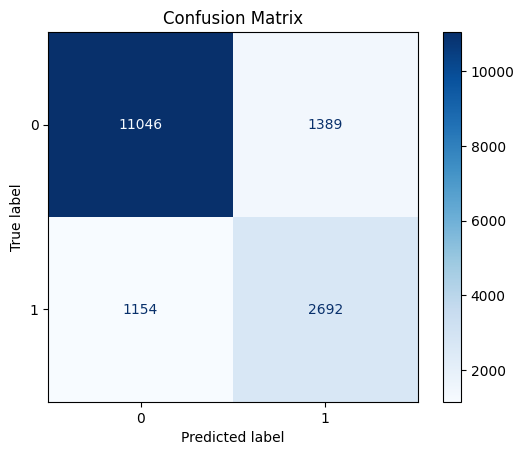

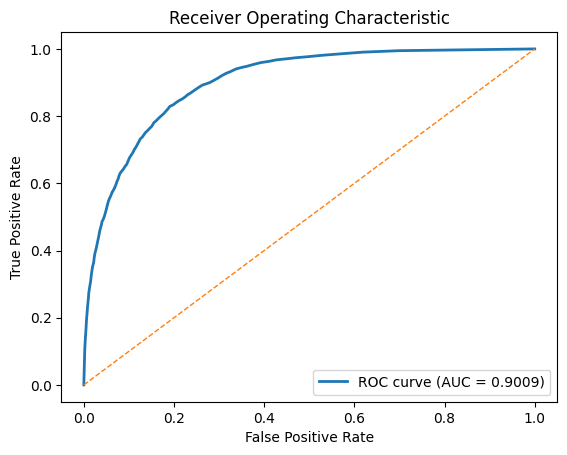

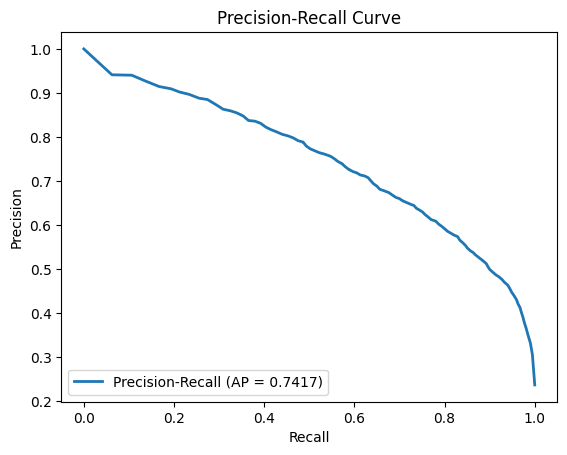

In [ ]:
#TODO
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
metrics_rf = evaluate_classification(y_test, y_pred_rf, y_prob=y_prob_rf, pos_label=1)

2. Answer this question:Why does Random Forest use more than one decision tree?

<b> <font color='red'>Your Answer:</font></b><br>
Random Forest uses dozens, hundreds, or even thousands of trees so that by averaging/voting you turn a set of individually unstable, overly-flexible models into a single, more accurate and robust predictor.

###4)Gradient Boosting Models (XGBoost, LightGBM, CatBoost)

These models build decision trees one at a time, where each new tree focuses on fixing the errors made by the previous ones. This process is called “boosting.” They add up the results of many trees to improve accuracy step-by-step.

###4-1)XGBoost

XGBoost builds decision trees sequentially, where each new tree focuses on correcting the errors of the previous ones. It uses a special technique called “gradient boosting” to minimize the overall loss function efficiently.

 **Your Task**:
1. implement and train the XGBoost classifier on the training dataset.(and then evaluate it on the test dataset)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:42:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8566
Precision: 0.6757
Recall: 0.7553
F1 Score: 0.7133


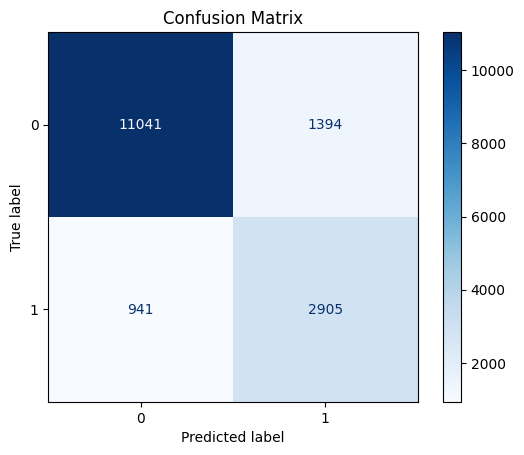

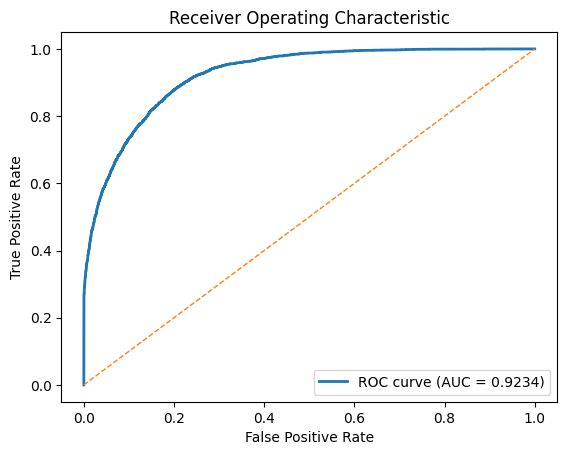

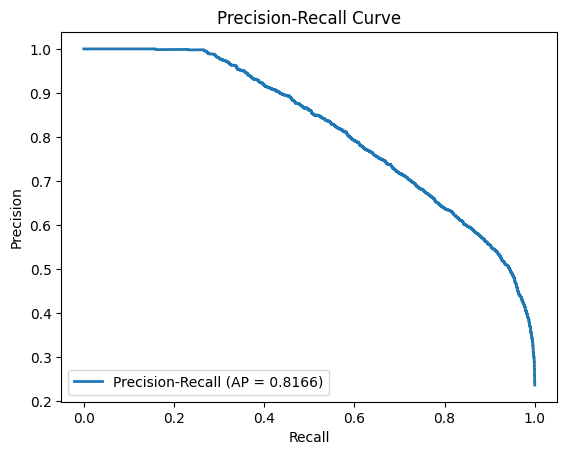

In [ ]:
#TODO
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
metrics_xgb = evaluate_classification(y_test, y_pred_xgb, y_prob=y_prob_xgb, pos_label=1)

2. Answer this question:Why does XGBoost build trees in sequence?

<b> <font color='red'>Your Answer:</font></b><br>
XGBoost builds trees in sequence because each tree is an incremental correction to the ensemble so far. This additive, gradient‐based approach focuses new trees on the remaining errors, yielding a highly accurate and controllable model.

###4-2)LightGBM

LightGBM (Light Gradient Boosting Machine) is a fast, efficient gradient LightGBM is a gradient boosting algorithm that grows trees leaf-wise instead of level-wise, meaning it chooses the leaf with the highest error to grow, which leads to faster and potentially more accurate learning.

 **Your Task**:
1. Implement and train the LightGBM classifier on the training dataset.(and then evaluate it on the test dataset)

[LightGBM] [Info] Number of positive: 24283, number of negative: 24283
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 48566, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.8554
Precision: 0.6718
Recall: 0.7585
F1 Score: 0.7125


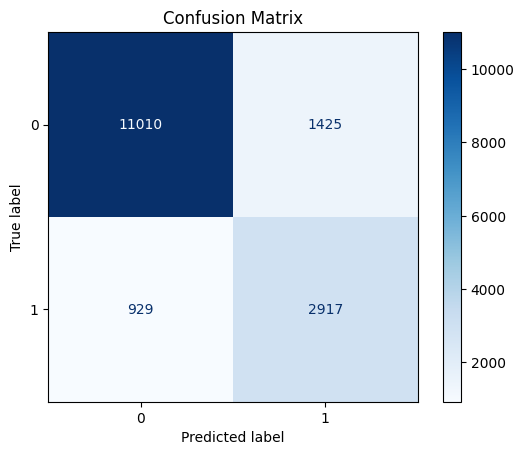

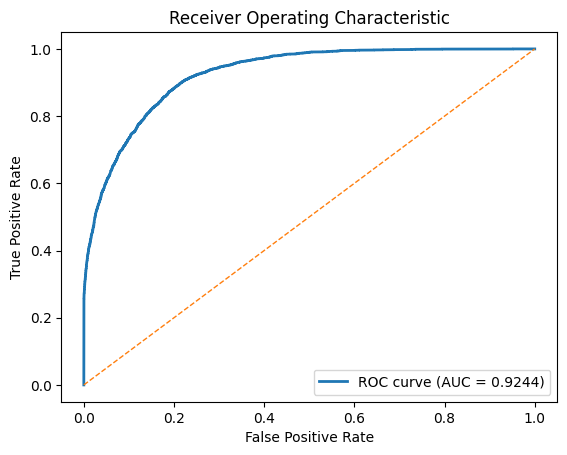

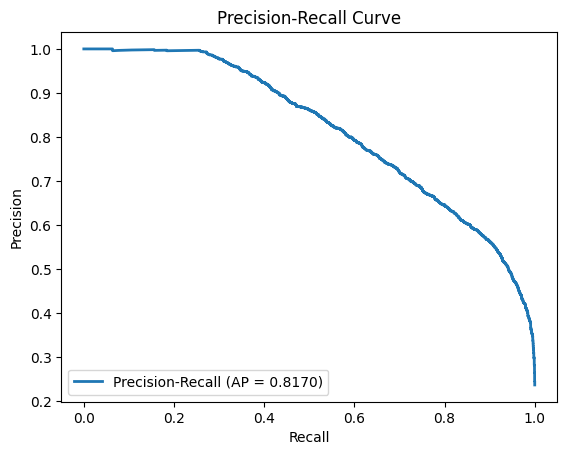

In [ ]:
#TODO
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train_res, y_train_res)
y_pred_lgb = lgb.predict(X_test)
y_prob_lgb = lgb.predict_proba(X_test)[:, 1]
metrics_lgb = evaluate_classification(y_test, y_pred_lgb, y_prob=y_prob_lgb, pos_label=1)

2. Answer this question:How does LightGBM grow trees differently?

<b> <font color='red'>Your Answer:</font></b><br>
Growth strategy

- XGBoost: level-wise (breadth-first)—splits all nodes at each depth before going deeper.

- LightGBM: leaf-wise (best-first)—always splits the leaf with the biggest gain, producing deeper, unbalanced trees.

Data and feature optimizations

- Histogram binning: both use histograms, but LightGBM bins all features upfront (e.g. into 255 bins) for faster split searches and lower memory.

- Gradient-based One-Sided Sampling (GOSS): LightGBM keeps all high-gradient (hard) examples and samples from low-gradient ones to speed up training without losing key information.

- Exclusive Feature Bundling (EFB): LightGBM automatically merges sparse, non-overlapping features into single bins, reducing dimensionality.

###5)Logistic Regression

Logistic Regression is a model that calculates the probability of a data point belonging to a class. It uses a linear combination of input features and passes the result through a function that outputs values between 0 and 1 (called the sigmoid function).

 **Your Task**:
1. Implement and train the Logistic Regression classifier on the training dataset.(and then evaluate it on the test dataset)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.2362
Precision: 0.2362
Recall: 1.0000
F1 Score: 0.3822


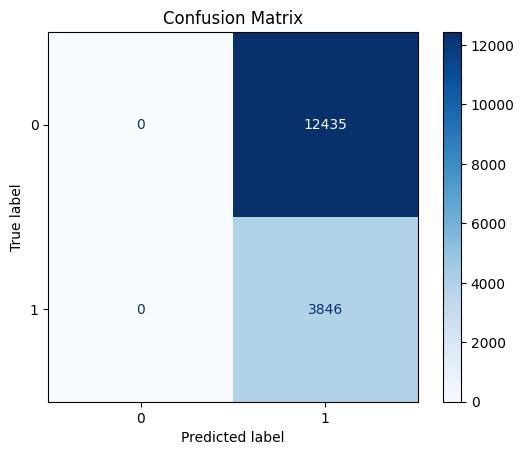

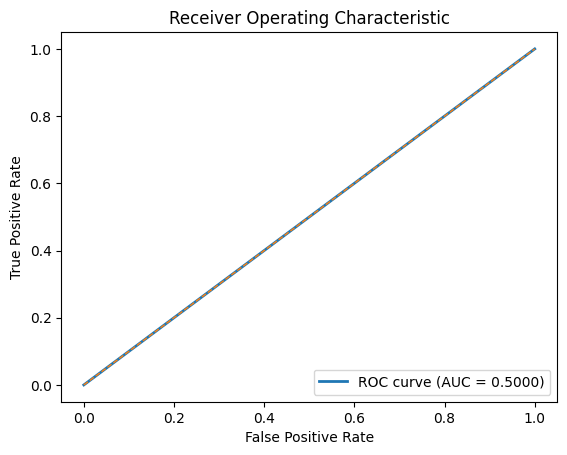

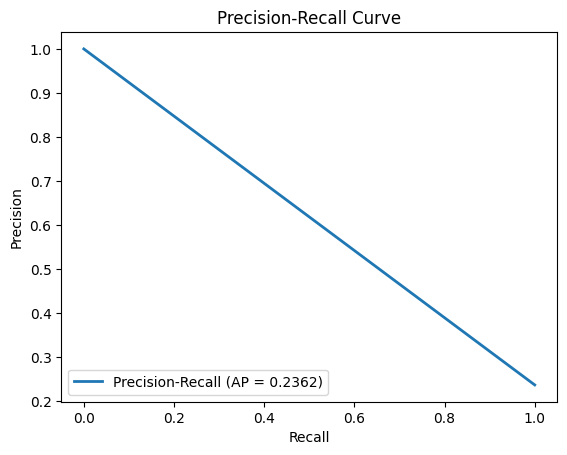

In [ ]:
#TODO
lr = LogisticRegression(max_iter=5000, random_state=42)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]
metrics_lr = evaluate_classification(y_test, y_pred_lr, y_prob=y_prob_lr, pos_label=1)

2. Answer this question:How is the linear formula used in this logistic regression?

<b> <font color='red'>Your Answer:</font></b><br>
Logistic regression is a two-step process:

Scoring by weighted evidence

You start by giving each input feature a “weight” that reflects how important it is for predicting your outcome.

For any new example, you look at each feature, multiply it by its weight, and add them all up. That gives you a single “score” that says how strongly the features as a whole point toward the positive class.

Squashing the score into a probability

That raw score can be anywhere on the number line—even huge positives or negatives—but what we really want is a probability between 0% and 100%.

So we feed the score into an S-shaped curve (the logistic or sigmoid function). Small or negative scores get mapped close to 0%; large positive scores get mapped close to 100%; middle-of-the-road scores end up near 50%.

The steeper the curve around 50%, the more a small change in the score flips your prediction from “unlikely” to “likely.”

Once you have that probability, you can decide class membership (e.g. say “positive” whenever it’s above 50%) or you can simply use the probability itself if you need calibrated confidence. Under the hood, the learning algorithm tweaks the feature weights so that those probabilities match your training labels as closely as possible.

###6)SVM with different kernels (e.g., linear, RBF)

SVM finds a line (or a plane in higher dimensions) that best separates the classes in the data. It tries to place this line as far as possible from the nearest points of each class. With different kernels (like linear or RBF), it can also handle non-linear data.

 **Your Task**:
1. Implement and train the SVM classifier on the training dataset.(and then evaluate it on the test dataset)

Accuracy: 0.7994
Precision: 0.6720
Recall: 0.2946
F1 Score: 0.4096


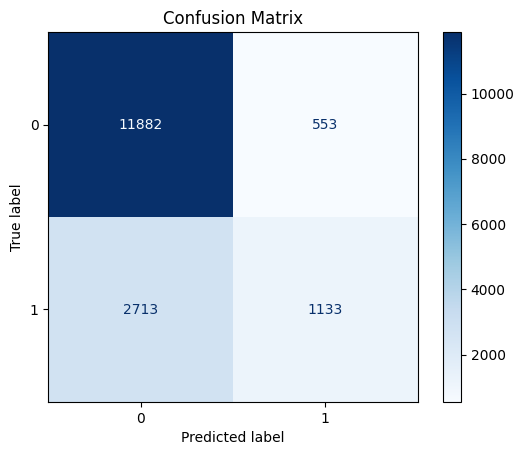

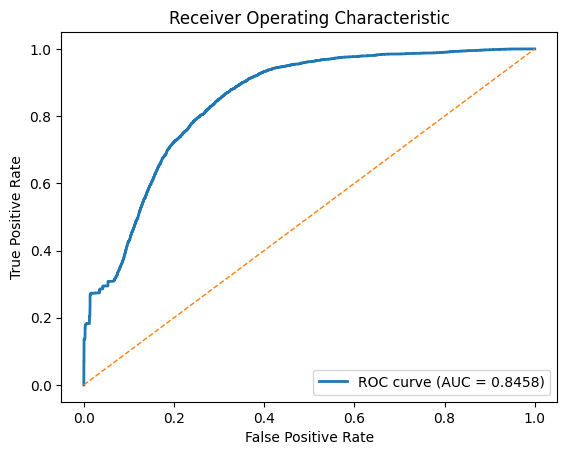

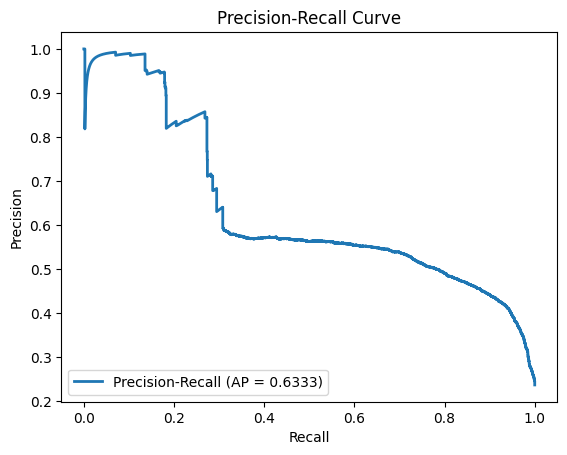

In [ ]:
#TODO
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_res, y_train_res)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]
metrics_svm = evaluate_classification(y_test, y_pred_svm, y_prob=y_prob_svm, pos_label=1)

2. Answer this question:How does SVM handle data that can’t be separated by a straight line?

<b> <font color='red'>Your Answer:</font></b><br>
Choose C to allow the right amount of mis-classification for your noisy data.
Choose (and tune) a kernel so that, in the transformed space, your classes become (or nearly become) linearly separable.

###7)Neural Networks (simple MLP for classification)

A Multi-Layer Perceptron (MLP) is a neural network made of layers of connected nodes (neurons). Each neuron takes inputs, applies weights and an activation function, and passes the result to the next layer. It learns by adjusting the weights to reduce prediction error.

 **Your Task**:
1. Implement and train the Neural Networks classifier (simple MLP for classification) on the training dataset.(and then evaluate it on the test dataset)

Accuracy: 0.7956
Precision: 0.5428
Recall: 0.8541
F1 Score: 0.6638


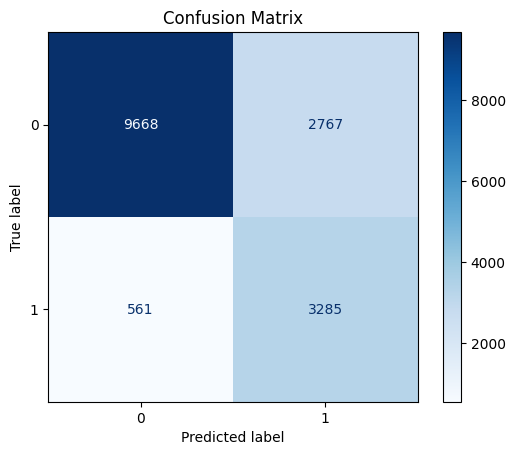

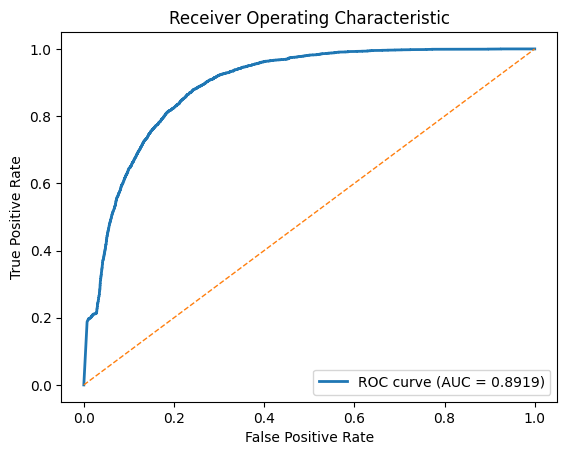

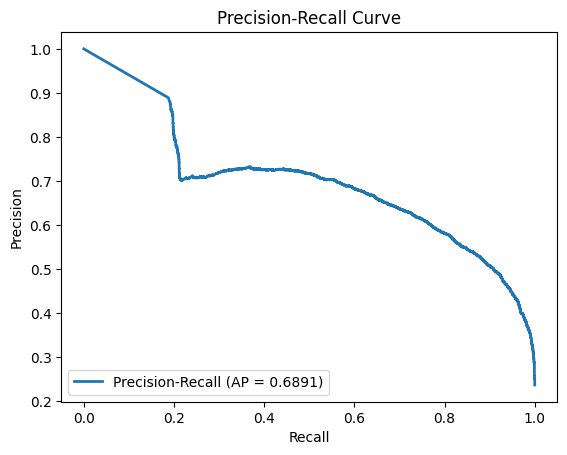

In [ ]:
#TODO
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_res, y_train_res)
y_pred_mlp = mlp.predict(X_test)
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]
metrics_mlp = evaluate_classification(y_test, y_pred_mlp, y_prob=y_prob_mlp, pos_label=1)

2. Answer this question:What happens during the learning process in a neural network?

<b> <font color='red'>Your Answer:</font></b><br>
During training, a neural network begins with randomly initialized weights and biases and then repeatedly processes batches of input data through a forward pass to generate predictions, computes a loss measuring the gap between those predictions and the true targets, and uses backpropagation to calculate gradients of the loss with respect to each parameter. An optimizer—such as stochastic gradient descent or Adam—then updates the weights and biases in the direction that reduces the loss. By iterating this cycle over many mini-batches and epochs, while monitoring performance on a validation set and applying techniques like regularization and learning-rate scheduling, the network gradually converges on parameter values that enable it to generalize well to new data.


# Step 12: Hyperparameter Tuning
Once you have selected the models, you will perform **hyperparameter tuning** to optimize their performance. Hyperparameters are settings that are not learned directly from the data and must be set before training. Examples include the number of neighbors in KNN or the depth of trees in decision tree models.

**Overview:**

You are required to implement the following methods for tuning:

- **Grid Search:** Use Grid Search to search for the best combination of hyperparameters by exhaustively trying all possible combinations in the predefined grid.
- **Randomized Search:** This method performs a randomized search over hyperparameters, sampling from specified distributions. It is more efficient than Grid Search when the search space is large.
- **Bayesian Optimization (optional):** Implement Bayesian optimization using libraries like **Optuna** or **Hyperopt**. This method optimizes hyperparameters by considering prior knowledge of the search space and efficiently explores the most promising configurations.


###1)Grid Search

Grid Search is a method used to find the best combination of hyperparameters by trying out every possible combination from a predefined set of values. For each combination, the model is trained and evaluated, and the one that gives the best result on a validation set is chosen. It helps you systematically explore which settings work best for your model.

**Your Task**:

1.Perform Grid Search on the models.

In [ ]:
from sklearn.model_selection import GridSearchCV

Grid Searching KNN...
Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy: 0.8960

Grid Searching DecisionTree...
Best parameters for DecisionTree: {'max_depth': 20, 'min_samples_split': 5}
Best cross-validation accuracy: 0.8571

Grid Searching RandomForest...
Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 200}
Best cross-validation accuracy: 0.9006

Grid Searching XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:43:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation accuracy: 0.8850

Grid Searching LightGBM...
[LightGBM] [Info] Number of positive: 24283, number of negative: 24283
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 48566, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 50}
Best cross-validation accuracy: 0.8967

Grid Searching LogisticRegression...
Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8253

Grid Searching MLP...
Best parameters for MLP: {'activation

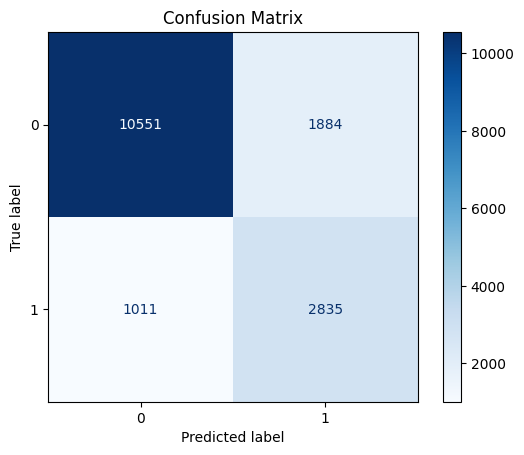

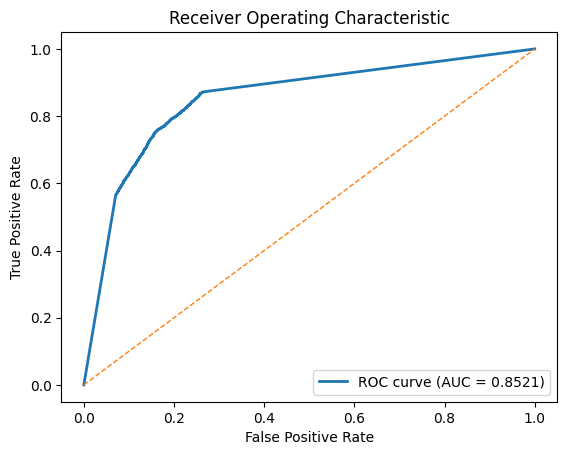

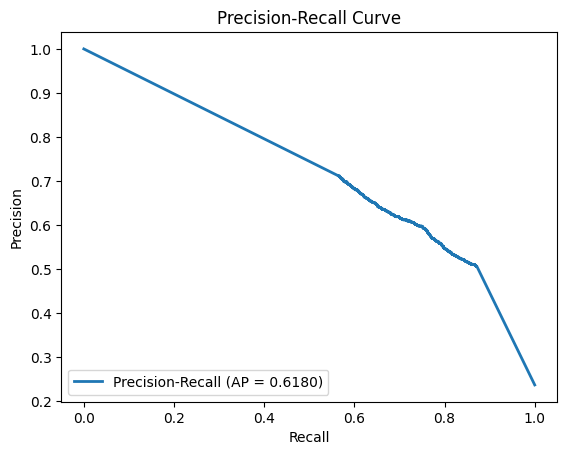


DecisionTree:
Accuracy: 0.8138
Precision: 0.5834
Recall: 0.7410
F1 Score: 0.6528


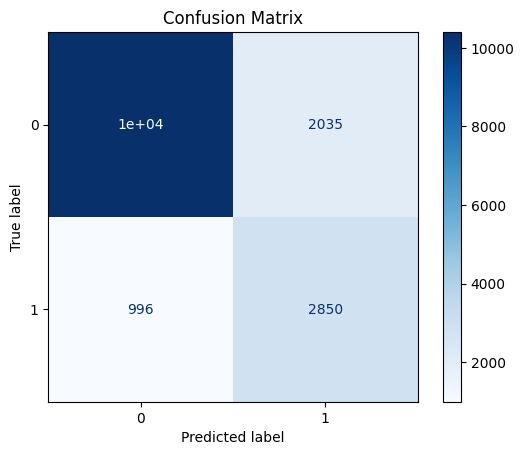

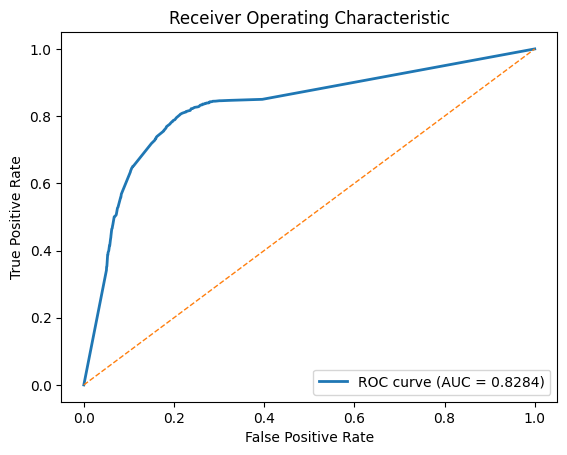

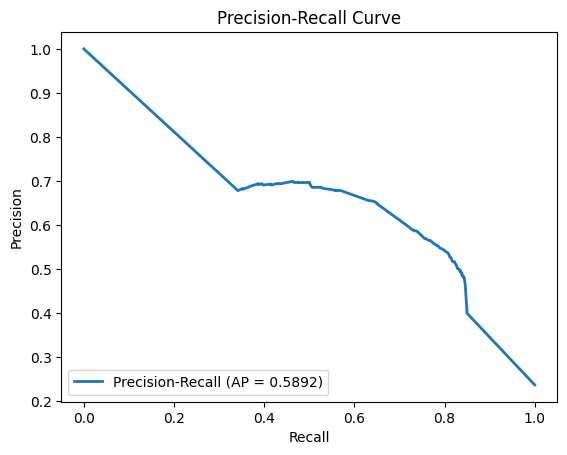


RandomForest:
Accuracy: 0.8448
Precision: 0.6604
Recall: 0.7064
F1 Score: 0.6827


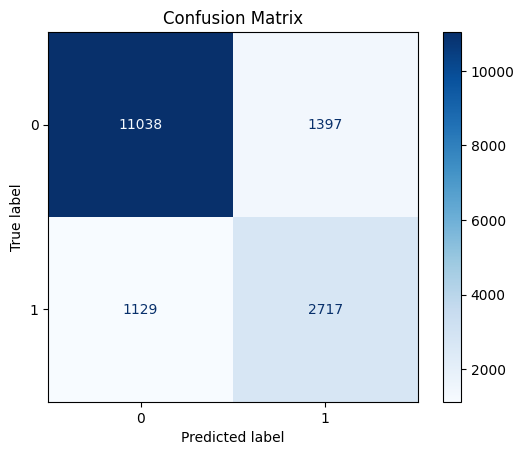

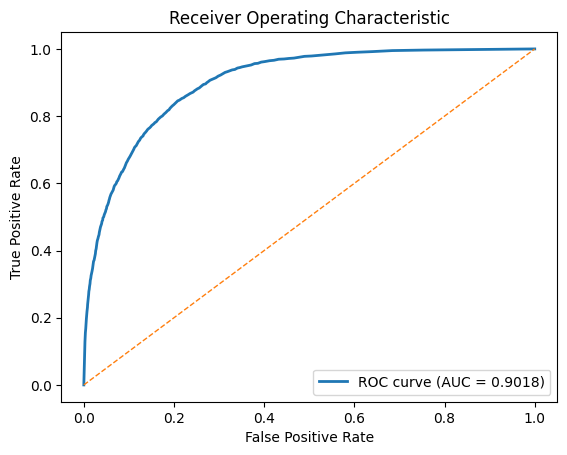

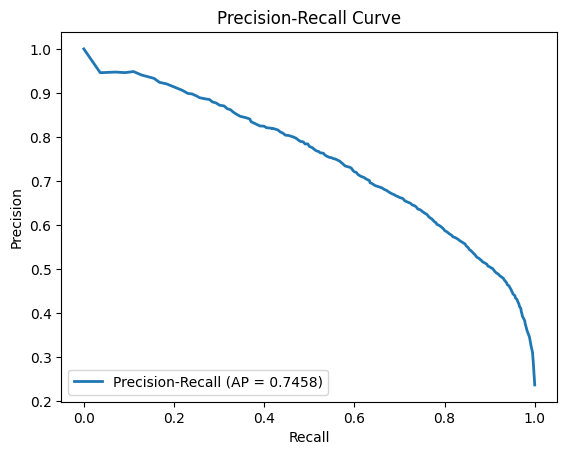


XGBoost:
Accuracy: 0.8501
Precision: 0.6487
Recall: 0.7967
F1 Score: 0.7151


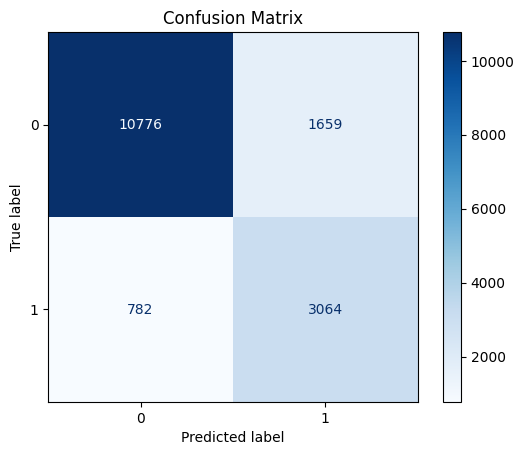

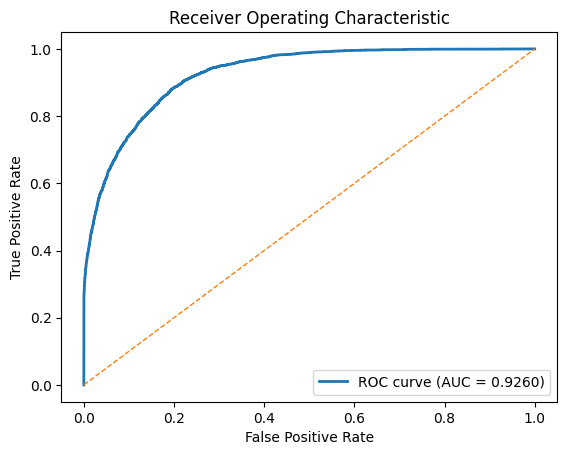

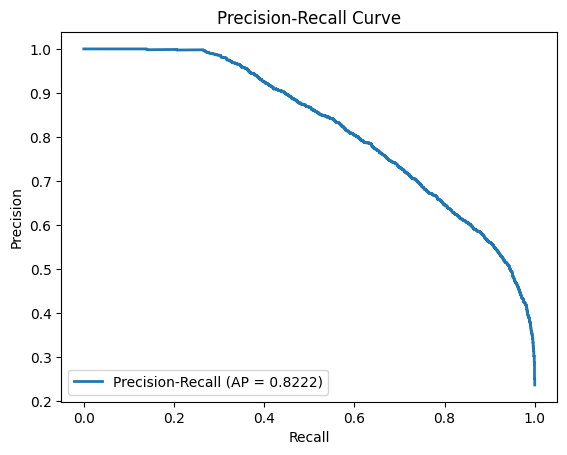


LightGBM:
Accuracy: 0.8647
Precision: 0.7120
Recall: 0.7174
F1 Score: 0.7147


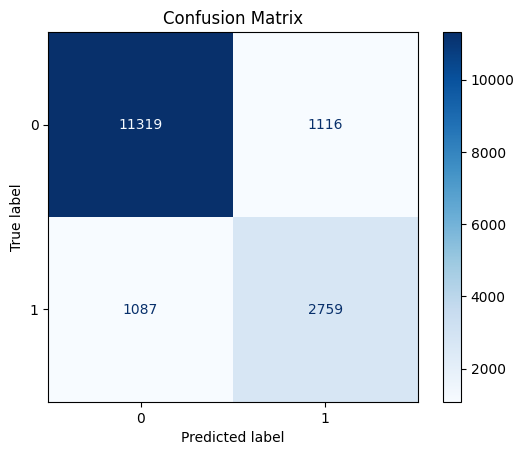

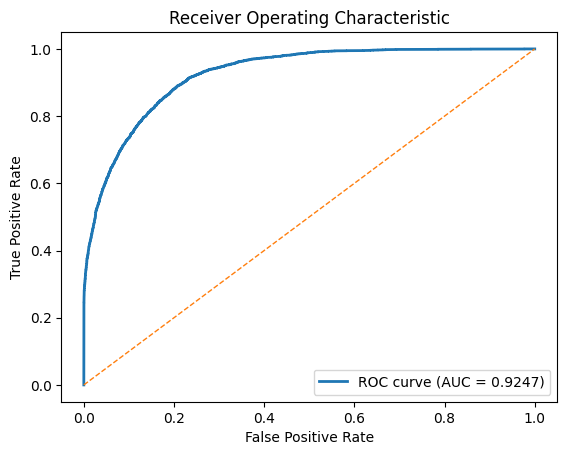

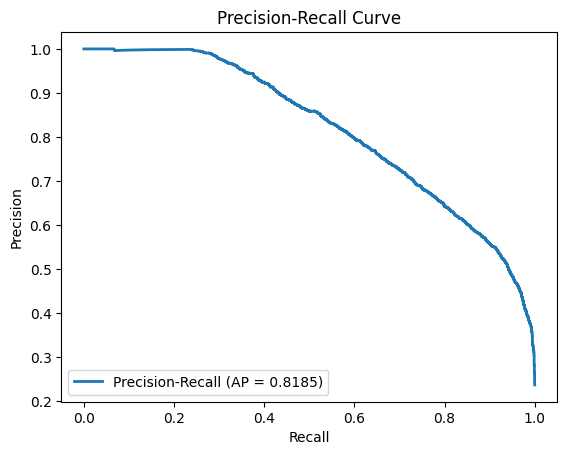


LogisticRegression:
Accuracy: 0.8003
Precision: 0.5497
Recall: 0.8560
F1 Score: 0.6694


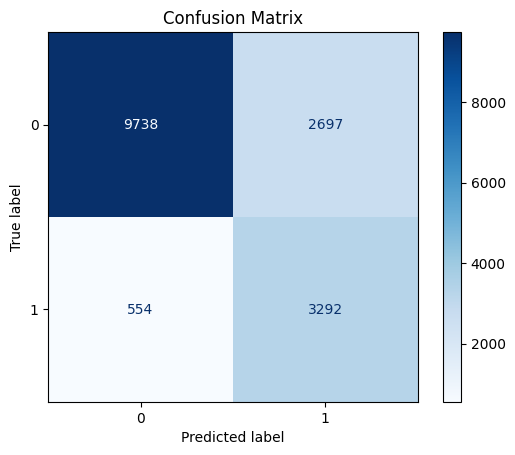

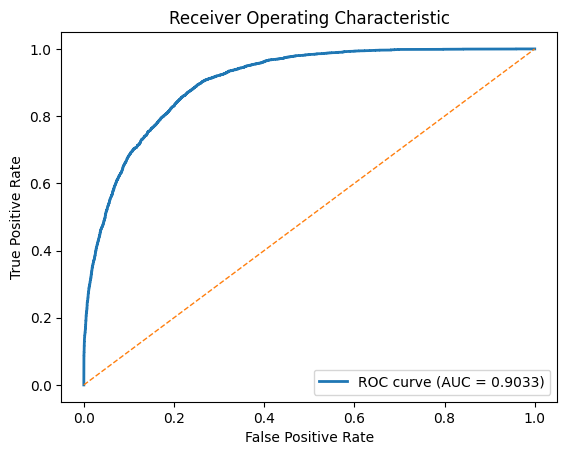

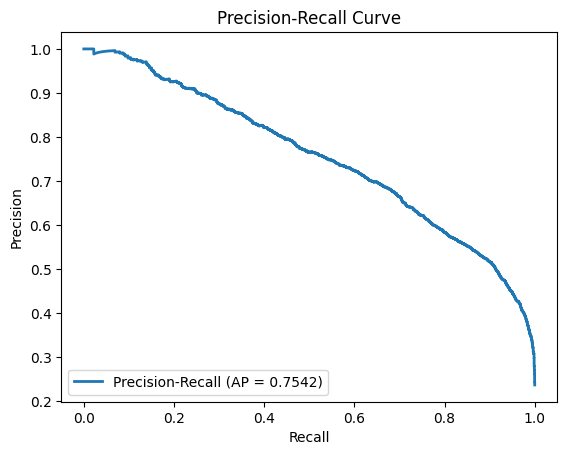


MLP:
Accuracy: 0.8158
Precision: 0.5766
Recall: 0.8287
F1 Score: 0.6800


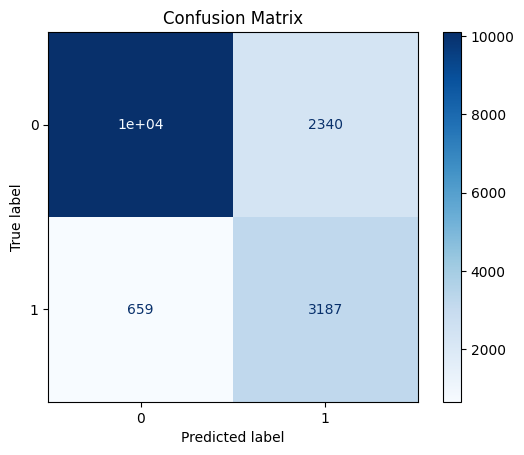

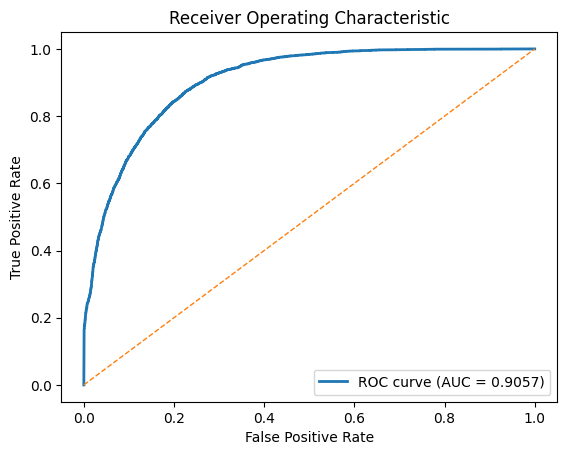

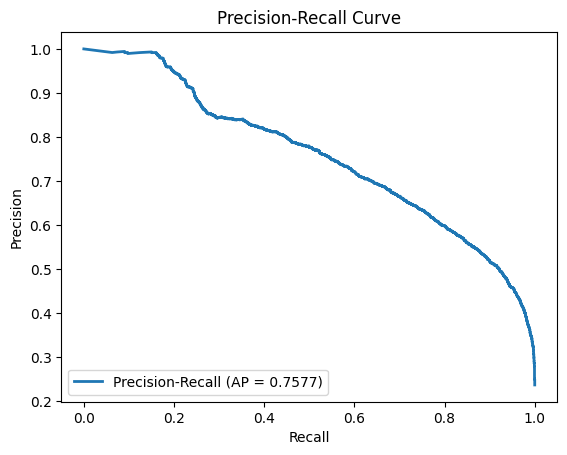

In [ ]:
#TODO
models = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}

param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200]
    },
    'LightGBM': {
        'num_leaves': [31, 50],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [100, 200]
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001]
    }
}

best_estimators = {}
for name, model in models.items():
    print(f"Grid Searching {name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid.fit(X_train_res, y_train_res)
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best cross-validation accuracy: {grid.best_score_:.4f}\n")
    best_estimators[name] = grid.best_estimator_

print("\nTest Set Performance:")
for name, estimator in best_estimators.items():
    y_pred = estimator.predict(X_test)
    y_prob = estimator.predict_proba(X_test)[:, 1]
    print(f"\n{name}:")
    metrics = evaluate_classification(y_test, y_pred, y_prob=y_prob, pos_label=1)

2. Answer this question:Is Grid Search efficient for large search spaces?

<b> <font color='red'>Your Answer:</font></b><br>
Grid search is conceptually simple—you specify a discrete set of values for each hyperparameter and exhaustively train/evaluate your model on every combination—but it becomes highly inefficient as the number of hyperparameters or the size of each parameter grid grows. Here’s why:

Exponential growth
If you have H hyperparameters and you test N values per parameter, you’ll perform N^H model trainings. For just 5 parameters with 10 choices each, that’s
10^5=100,000 trainings—often completely infeasible in practice.

Curse of dimensionality
As dimensionality increases, even a modest grid becomes sparse. You end up either wasting time evaluating uninformative regions, or forced to make the grid coarse (wider spacing), risking that you miss the true optimum lying between grid points.

Uniform resource allocation
Grid search devotes the same computational budget to every region of the space—even obviously poor-performing ones—rather than focusing on promising areas.

###2)Randomized Search

Randomized Search selects random combinations of hyperparameters from specified distributions instead of testing every single one. You choose how many random combinations to try, and the best one is picked based on performance. It's useful when you want to sample from a wide space without checking everything.

**Your Task**:

1.Perform Randomized Search on the models.

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

Randomized Searching KNN...
Best parameters for KNN: {'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation accuracy: 0.8988

Randomized Searching DecisionTree...
Best parameters for DecisionTree: {'max_depth': 19, 'min_samples_split': 12}
Best cross-validation accuracy: 0.8562

Randomized Searching RandomForest...
Best parameters for RandomForest: {'max_depth': 44, 'n_estimators': 207}
Best cross-validation accuracy: 0.8997

Randomized Searching XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:04:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': np.float64(0.153518667960354), 'n_estimators': 183, 'subsample': np.float64(0.6039708314340944)}
Best cross-validation accuracy: 0.8896

Randomized Searching LightGBM...
[LightGBM] [Info] Number of positive: 24283, number of negative: 24283
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 48566, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for LightGBM: {'learning_rate': np.float64(0.07960875022580143), 'n_estimators': 239, 'num_leaves': 81}
Best cross-validation accuracy: 0.8979


Test Set Performance:

KNN:
Accuracy: 0.8239
Precision: 0.6043
Recall: 0.7371
F1 Score: 0.6642


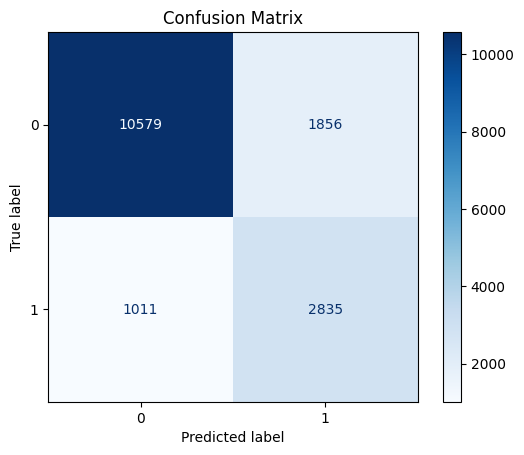

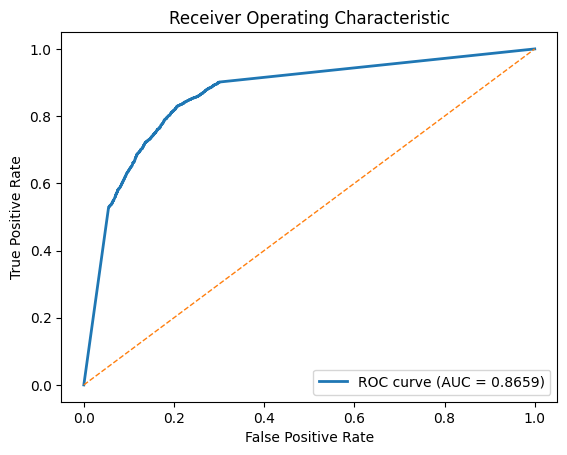

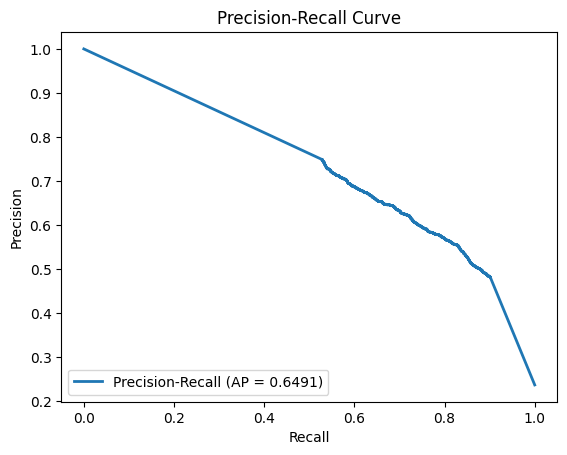


DecisionTree:
Accuracy: 0.8154
Precision: 0.5843
Recall: 0.7577
F1 Score: 0.6598


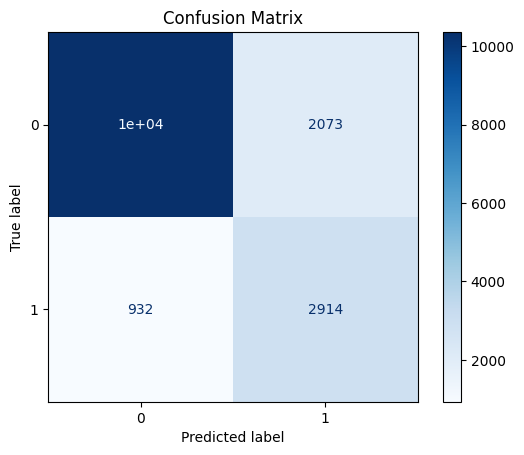

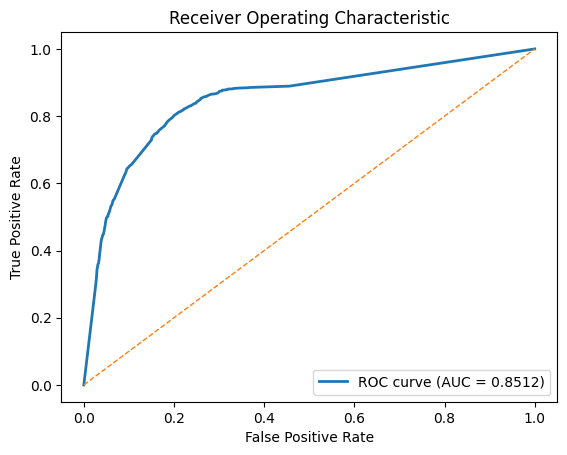

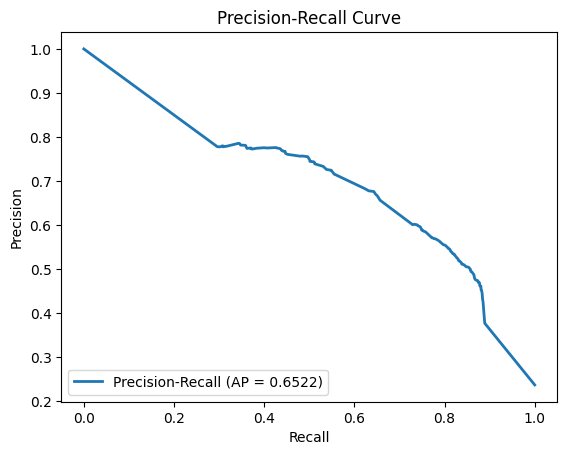


RandomForest:
Accuracy: 0.8421
Precision: 0.6519
Recall: 0.7114
F1 Score: 0.6803


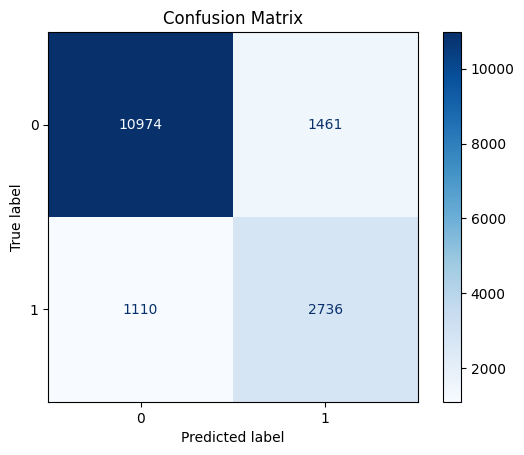

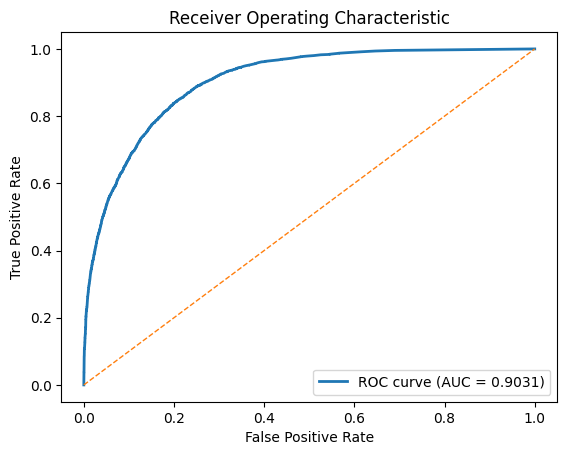

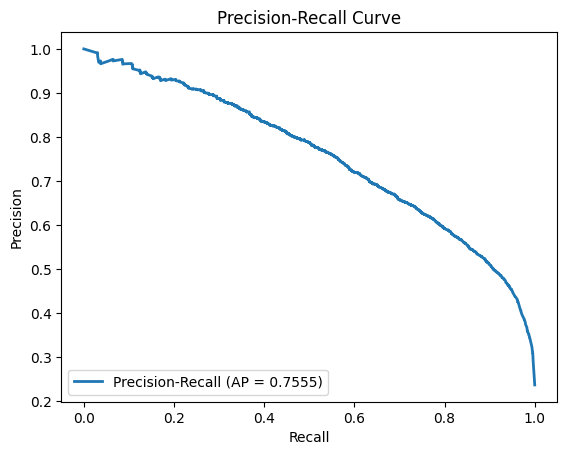


XGBoost:
Accuracy: 0.8560
Precision: 0.6740
Recall: 0.7559
F1 Score: 0.7126


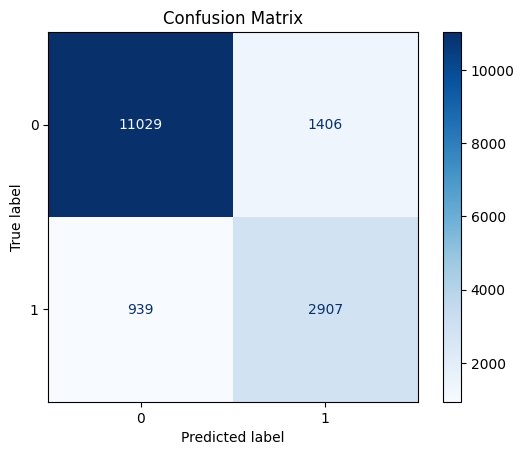

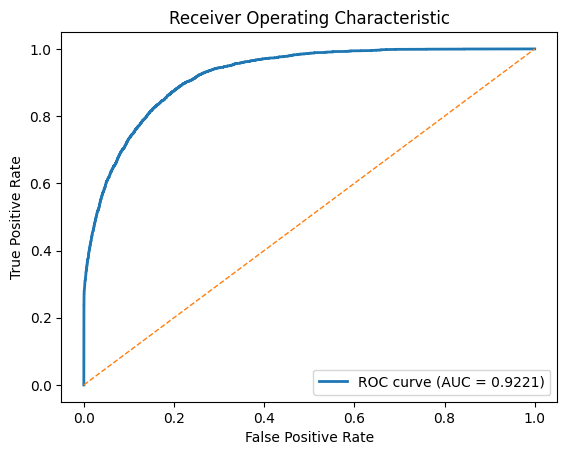

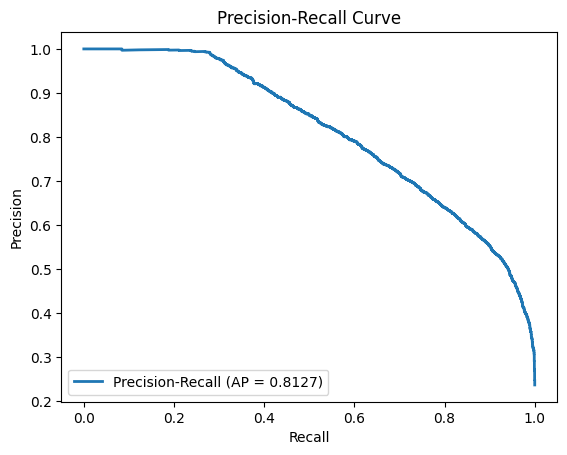


LightGBM:
Accuracy: 0.8645
Precision: 0.7195
Recall: 0.6989
F1 Score: 0.7090


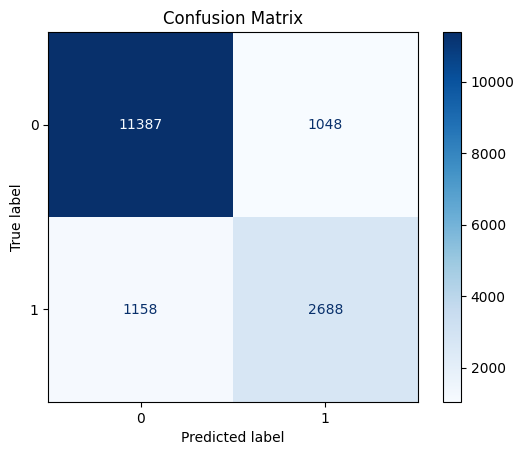

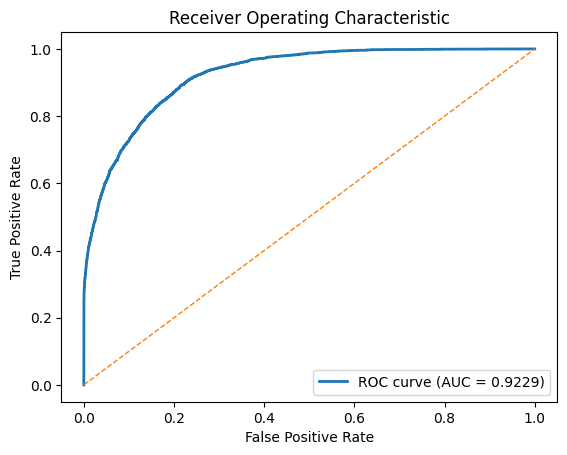

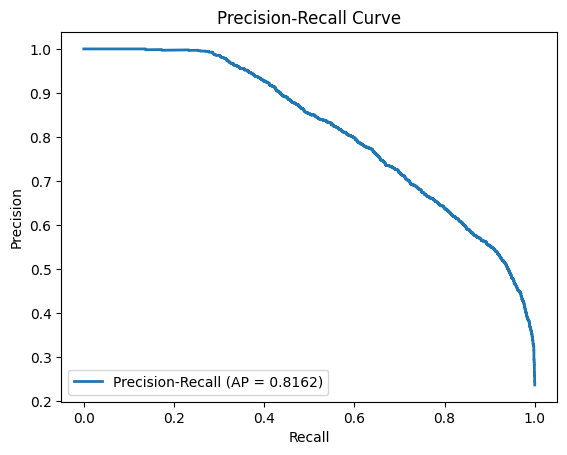

In [44]:
#TODO
models = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

param_dist = {
    'KNN': {
        'n_neighbors': randint(3, 20),
        'weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'max_depth': randint(1, 50),
        'min_samples_split': randint(2, 20)
    },
    'RandomForest': {
        'n_estimators': randint(50, 300),
        'max_depth': randint(1, 50)
    },
    'XGBoost': {
        'learning_rate': uniform(0.01, 0.19),
        'n_estimators': randint(50, 300),
        'subsample': uniform(0.5, 0.5)
    },
    'LightGBM': {
        'num_leaves': randint(20, 100),
        'learning_rate': uniform(0.01, 0.19),
        'n_estimators': randint(50, 300)
    }
}

best_estimators_rs = {}
for name, model in models.items():
    print(f"Randomized Searching {name}...")
    rand_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist[name],
        n_iter=20,
        cv=5,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )
    rand_search.fit(X_train_res, y_train_res)
    print(f"Best parameters for {name}: {rand_search.best_params_}")
    print(f"Best cross-validation accuracy: {rand_search.best_score_:.4f}\n")
    best_estimators_rs[name] = rand_search.best_estimator_

print("\nTest Set Performance:")
for name, estimator in best_estimators_rs.items():
    y_pred = estimator.predict(X_test)
    y_prob = estimator.predict_proba(X_test)[:, 1]
    print(f"\n{name}:")
    metrics = evaluate_classification(y_test, y_pred, y_prob=y_prob, pos_label=1)

2. Answer this question:What’s the main difference from Grid Search?

<b> <font color='red'>Your Answer:</font></b><br>
The core distinction boils down to how the hyperparameter combinations are chosen:

Grid Search

- Deterministic, exhaustive scanning of a predefined grid: you pick N values for each of H hyperparameters and evaluate every one of the N^H combinations.

- Guarantees you’ve tested exactly those points—but can be wildly inefficient if the grid is large or high-dimensional.

- Tends to “waste” trials on unimportant parameters or unpromising regions of the space.

Randomized Search

- Stochastic sampling of hyperparameter settings: you specify a distribution (or list) for each hyperparameter and a total number of trials T, then draw T random combinations from those distributions.

- You control total budget up front (e.g. 100 evaluations), regardless of how many hyperparameters or values you defined.

- More likely to find a good region quickly—because if one parameter doesn’t matter much, you’re not repeatedly sampling the same fixed values for it.

###3)Bayesian Optimization (optional, e.g., with libraries like Optuna or Hyperopt)

Bayesian Optimization is a smarter way of tuning hyperparameters. It builds a model of the performance (objective function) based on past results and decides which hyperparameters to try next by predicting which ones might work better. Libraries like Optuna or Hyperopt help automate this process.

In [47]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 4.8 MB/s eta 0:00:00


In [59]:
import optuna
from sklearn.model_selection import cross_val_score

In [60]:
#TODO
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }

    model = XGBClassifier(**params, n_estimators=100, objective='binary:logistic', random_state=42)
    scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
    return scores.mean()

In [62]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=25)

print(f"Best hyperparameters: {study.best_params}")
print(f"Best score: {study.best_value:.4f}")

[I 2025-05-11 08:51:28,192] A new study created in memory with name: no-name-eee56406-442b-4534-a12a-6ce297c883a3
[I 2025-05-11 08:51:38,336] Trial 0 finished with value: 0.8426887262540745 and parameters: {'max_depth': 6, 'learning_rate': 0.004174699692662719, 'subsample': 0.6809381337488386, 'colsample_bytree': 0.6007680437307235}. Best is trial 0 with value: 0.8426887262540745.
[I 2025-05-11 08:51:42,422] Trial 1 finished with value: 0.8305402206174952 and parameters: {'max_depth': 4, 'learning_rate': 0.0010219090685238635, 'subsample': 0.607998420807206, 'colsample_bytree': 0.8229130873768382}. Best is trial 0 with value: 0.8426887262540745.
[I 2025-05-11 08:51:50,639] Trial 2 finished with value: 0.8866295308671621 and parameters: {'max_depth': 10, 'learning_rate': 0.07024451638170423, 'subsample': 0.7781008248375645, 'colsample_bytree': 0.6643423329938576}. Best is trial 2 with value: 0.8866295308671621.
[I 2025-05-11 08:51:54,113] Trial 3 finished with value: 0.880720226184304 a

Best hyperparameters: {'max_depth': 9, 'learning_rate': 0.1592807564878846, 'subsample': 0.8313580875376714, 'colsample_bytree': 0.630333117493132}
Best score: 0.8912


In [63]:
final_model = XGBClassifier(**study.best_params, n_estimators=100, objective='binary:logistic', random_state=42)
final_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.630333117493132, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1592807564878846,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


Bayesian XGBoost
Accuracy: 0.8554
Precision: 0.6719
Recall: 0.7582
F1 Score: 0.7124


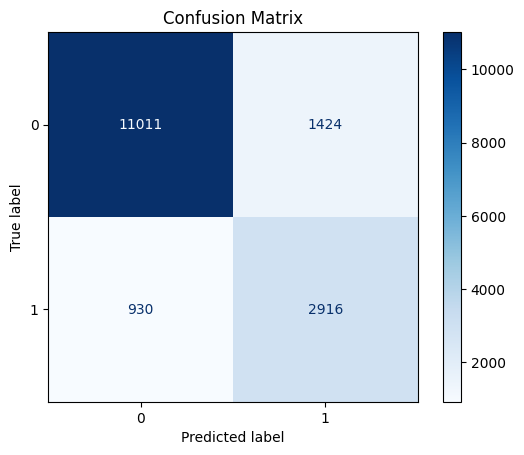

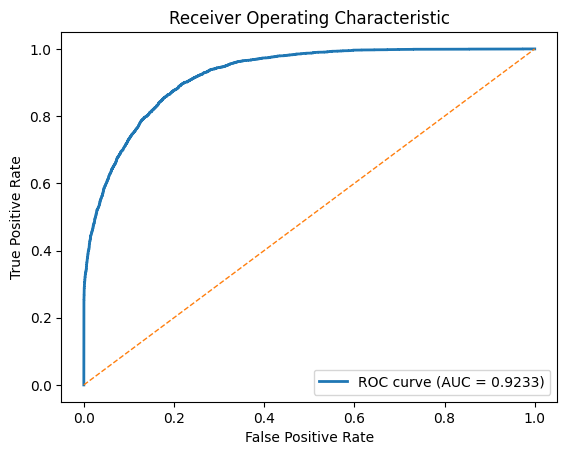

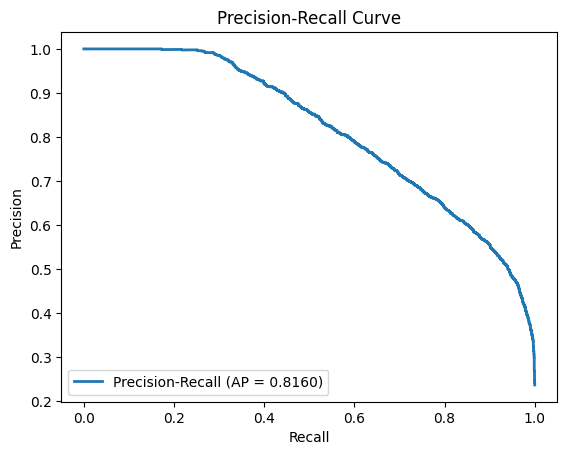

In [64]:
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]
print("\nBayesian XGBoost")
metrics = evaluate_classification(y_test, y_pred, y_prob=y_prob, pos_label=1)

2. Answer this question:What makes Bayesian Optimization smart?

<b> <font color='red'>Your Answer:</font></b><br>
Bayesian Optimization is a sample-efficient, black-box optimization method that builds a probabilistic surrogate model—typically a Gaussian process—to predict both the objective function’s mean and uncertainty over the search space. At each iteration, it updates this surrogate with Bayes’ rule based on new observations, refining its posterior belief about the function landscape. It then optimizes an inexpensive acquisition function—such as Expected Improvement or Upper Confidence Bound—that balances exploitation of high-mean regions and exploration of high-uncertainty areas to select the next evaluation point. By guiding evaluations toward the most promising inputs, Bayesian Optimization achieves high performance with far fewer expensive function calls than naive search methods.

# Step 13:Evaluation
This part of the project focuses on assessing the performance of the trained models. It involves comparing the model's predictions with the actual outcomes from the test dataset. This step helps determine how well each model generalizes to unseen data.

**Your Task**:

1.Answer this question: What are the formulas for Accuracy, Precision, Recall, F1-score?

<b> <font color='red'>Your Answer:</font></b><br>
Accuracy =  (TP+TN) / (TP+TN+FP+FN)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1-score = 2TP / (2TP + FP + FN)

2.Answer this question: What are the ROC Curve & AUC curve?

<b> <font color='red'>Your Answer:</font></b><br>
A ROC (Receiver Operating Characteristic) Curve is a graphical representation that shows how well a binary classification model distinguishes between two classes at different threshold settings. It plots the rate of true positives (correctly identified positives) against the rate of false positives (incorrectly identified positives) as the decision threshold changes.

The AUC (Area Under the Curve) measures the entire two-dimensional area underneath the ROC curve, providing a single number that summarizes the model's ability to separate positive from negative cases. An AUC of 1.0 represents perfect classification, while an AUC of 0.5 indicates performance no better than random guessing. Essentially, the closer the curve is to the top-left corner of the plot, the better the model's performance. The ROC and AUC are particularly useful for comparing models and assessing how well they perform across all possible classification thresholds.

3.Answer this question: What is a Confusion Matrix?

<b> <font color='red'>Your Answer:</font></b><br>
A Confusion Matrix is a table used to evaluate the performance of a classification model by comparing its predictions with the actual outcomes. It displays the number of correct and incorrect predictions, broken down by each class. The matrix consists of four main components: True Positives (TP), where the model correctly predicts the positive class; True Negatives (TN), where it correctly predicts the negative class; False Positives (FP), where it incorrectly predicts the positive class when it is actually negative (also known as a "Type I error"); and False Negatives (FN), where it incorrectly predicts the negative class when it is actually positive (a "Type II error"). This structured layout makes it easy to identify not just the overall accuracy of the model, but also more detailed metrics like precision, recall, and the types of errors the model tends to make, providing deeper insights into its strengths and weaknesses.

# Step 14: Cross-Validation (Optional)
To ensure the models generalize well to unseen data, you will use **cross-validation**. This technique splits the dataset into multiple subsets (folds), and each model is trained on different combinations of training and validation sets. This will give you a more robust estimate of the model's performance.

**"Note: You should implement cross-validation for only one model."**

In [65]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
)

In [68]:
#TODO
# I performed cross-validation on the final model that was optimized using the Bayesian optimization
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
}

cv_results = cross_validate(
    final_model,
    X_train_res,
    y_train_res,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():>9}: "
          f"{np.mean(scores):.4f} ± {np.std(scores):.4f}")

 Accuracy: 0.8971 ± 0.0026
      Auc: 0.8971 ± 0.0026
Precision: 0.8848 ± 0.0029
   Recall: 0.9132 ± 0.0036
       F1: 0.8988 ± 0.0026


# Step 15: Model Comparison
After evaluating all the models, you will compare them based on their performance metrics. The goal is to select the best model that performs well across multiple metrics and generalizes effectively to unseen data.

(Optional) you should apply **statistical tests** (such as **McNemar’s test**) to assess whether differences between model performances are statistically significant. This will help ensure the selection of the optimal model is based on solid evidence.

In [69]:
from statsmodels.stats.contingency_tables import mcnemar

In [70]:
def mcnemar_test(y_true, pred1, pred2, alpha=0.05):
    b = np.sum((pred1 == y_true) & (pred2 != y_true))
    c = np.sum((pred1 != y_true) & (pred2 == y_true))
    table = [[0, b], [c, 0]]

    result = mcnemar(table, exact=False)
    statistic = result.statistic
    p_value = result.pvalue
    reject = p_value < alpha
    return statistic, p_value, reject

In [74]:
# I performed McNemar's test on the models optimized using RandomSearch
test_preds = {}
for name, estimator in best_estimators_rs.items():
    y_pred = estimator.predict(X_test)
    test_preds[name] = y_pred

model_names = list(best_estimators_rs.keys())
alpha = 0.05
print("\nPairwise McNemar's Test Results:")
for i in range(len(model_names)):
    for j in range(i+1, len(model_names)):
        m1, m2 = model_names[i], model_names[j]
        stat, p, reject = mcnemar_test(y_test, test_preds[m1], test_preds[m2], alpha=alpha)
        print(f"{m1} vs {m2}: statistic={stat:.3f}, p-value={p:.3f}, significant={reject}")


Pairwise McNemar's Test Results:
KNN vs DecisionTree: statistic=7.083, p-value=0.008, significant=True
KNN vs RandomForest: statistic=52.173, p-value=0.000, significant=True
KNN vs XGBoost: statistic=129.504, p-value=0.000, significant=True
KNN vs LightGBM: statistic=206.348, p-value=0.000, significant=True
DecisionTree vs RandomForest: statistic=95.269, p-value=0.000, significant=True
DecisionTree vs XGBoost: statistic=223.856, p-value=0.000, significant=True
DecisionTree vs LightGBM: statistic=305.129, p-value=0.000, significant=True
RandomForest vs XGBoost: statistic=37.445, p-value=0.000, significant=True
RandomForest vs LightGBM: statistic=97.352, p-value=0.000, significant=True
XGBoost vs LightGBM: statistic=21.915, p-value=0.000, significant=True


## Step 17: Conclusion
At the end of this step, you will identify the best-performing model based on the evaluation metrics. You should then decide if further improvements (e.g., feature engineering, model ensembling) are necessary to achieve better results.